In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
#os.chdir('C:\\Users\\mukhg\\Downloads\\Train')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [4]:
os.getcwd()

'C:\\Users\\mukhg\\OneDrive\\Desktop\\New folder (3)'

In [5]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    print(path)
    images = os.listdir(path)
    print(i)
    for a in images:
        
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

C:\Users\mukhg\OneDrive\Desktop\New folder (3)\train\0
0
C:\Users\mukhg\OneDrive\Desktop\New folder (3)\train\1
1
C:\Users\mukhg\OneDrive\Desktop\New folder (3)\train\2
2
C:\Users\mukhg\OneDrive\Desktop\New folder (3)\train\3
3
C:\Users\mukhg\OneDrive\Desktop\New folder (3)\train\4
4
C:\Users\mukhg\OneDrive\Desktop\New folder (3)\train\5
5
C:\Users\mukhg\OneDrive\Desktop\New folder (3)\train\6
6
C:\Users\mukhg\OneDrive\Desktop\New folder (3)\train\7
7
C:\Users\mukhg\OneDrive\Desktop\New folder (3)\train\8
8
C:\Users\mukhg\OneDrive\Desktop\New folder (3)\train\9
9
C:\Users\mukhg\OneDrive\Desktop\New folder (3)\train\10
10
C:\Users\mukhg\OneDrive\Desktop\New folder (3)\train\11
11
C:\Users\mukhg\OneDrive\Desktop\New folder (3)\train\12
12
C:\Users\mukhg\OneDrive\Desktop\New folder (3)\train\13
13
C:\Users\mukhg\OneDrive\Desktop\New folder (3)\train\14
14
C:\Users\mukhg\OneDrive\Desktop\New folder (3)\train\15
15
C:\Users\mukhg\OneDrive\Desktop\New folder (3)\train\16
16
C:\Users\mukhg\On

In [6]:
print(data)
print(labels)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [32]:
#cur_path
df_test = pd.read_csv('Test.csv')
df_test.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png

In [33]:
df = pd.read_csv('Train.csv')
df.head()

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [35]:
import keras 
from keras.applications import Xception

In [36]:
data = np.array(data)
labels = np.array(labels)

In [37]:
train_data_link = os.getcwd() + '\\Train\\training\\data.npy'
test_data_link = os.getcwd() + '\\Train\\training\\target.npy'
np.save(train_data_link, data)
#np.save('./training/data',data)
np.save(test_data_link,labels)

In [39]:
data=np.load(train_data_link)
labels=np.load(test_data_link)

In [40]:
#print(data.shape, labels.shape)
print(type(data))
print(data.shape)
print(type(labels))
print(labels.shape)

<class 'numpy.ndarray'>
(39209, 30, 30, 3)
<class 'numpy.ndarray'>
(39209,)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [42]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [43]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [44]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
#epochs = 20
epochs = 1
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

981/981 [==============================] - 305s 309ms/step - loss: 1.8175 - accuracy: 0.5384 - val_loss: 0.3289 - val_accuracy: 0.9141


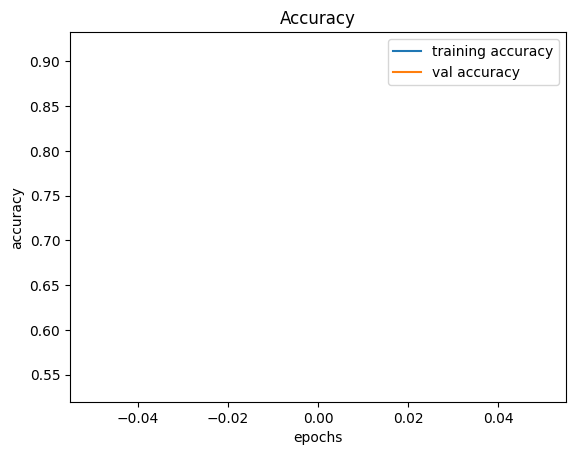

In [47]:
plt.figure()
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

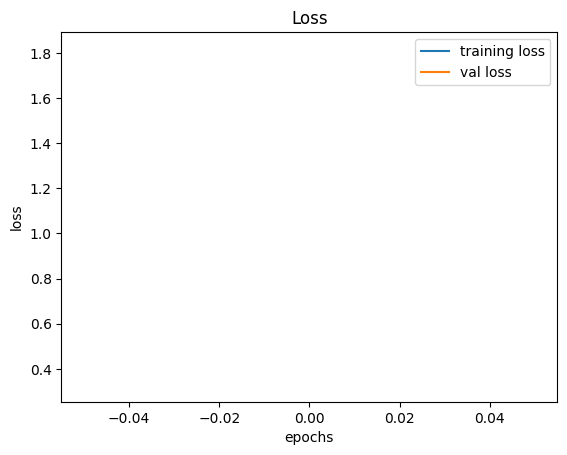

In [48]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [49]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test, label

In [50]:
X_test, label = testing('Test.csv')
print(len(label))

12630


In [51]:
X_test.shape

(12630, 30, 30, 3)

In [52]:
Y_pred = model.predict(X_test)
classes_x=np.argmax(Y_pred,axis=1)
Y_pred
print(classes_x)
#print(len(Y_pred))

395/395 [==============================] - 4s 10ms/step
[16  1 38 ... 15  7 10]


In [53]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, classes_x))

0.8711005542359461


In [54]:
model.save("./training/TSR.h5")

In [56]:
import os
#os.chdir(r'D:\Traffic_Sign_Recognition')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [57]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [58]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    #predict_x=model.predict(X_test) 
    classes_x=np.argmax(Y_pred,axis=1)
    return image,classes_x

1/1 [==============================] - 0s 113ms/step
9
Predicted traffic sign is:  No passing


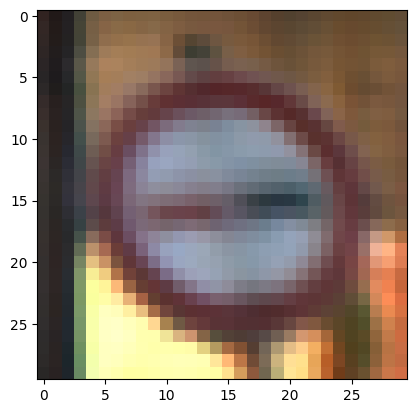

In [59]:
plot,prediction = test_on_img(r'C:\Users\mukhg\Downloads\Test\01380.png')
s = [str(i) for i in prediction] 
print(s[0])
a = int("".join(s))
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

In [60]:
img=cv2.imread(r'C:\Users\mukhg\Downloads\Test\01380.png',0)
print(img.shape)

(41, 39)


In [61]:
#image = img.resize((30,30))
gauss_noise=np.zeros((img.shape),dtype=np.uint8)
cv2.randn(gauss_noise,120,20)
#cv2.randn(gauss_noise,300,50)
#cv2.randn(gauss_noise,90,1)
#gauss_noise=(gauss_noise*0.5).astype(np.uint8)
gn_img=cv2.add(img,gauss_noise)

In [62]:
print(gn_img.shape)

(41, 39)


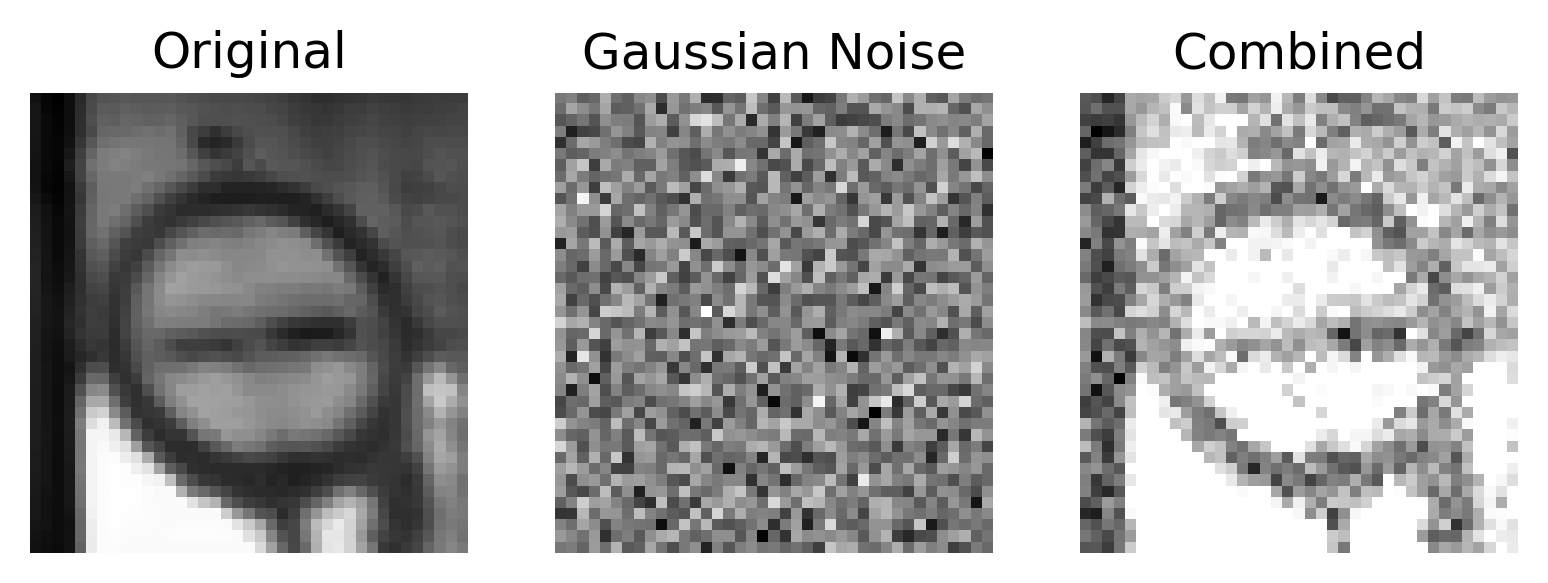

In [63]:

fig=plt.figure(dpi=300)



fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(gauss_noise,cmap='gray')
plt.axis("off")
plt.title("Gaussian Noise")

fig.add_subplot(1,3,3)
plt.imshow(gn_img,cmap='gray')
plt.axis("off")
plt.title("Combined")
plt.show()

In [71]:
print(gn_img.shape)

(41, 39)


(54, 53, 3)


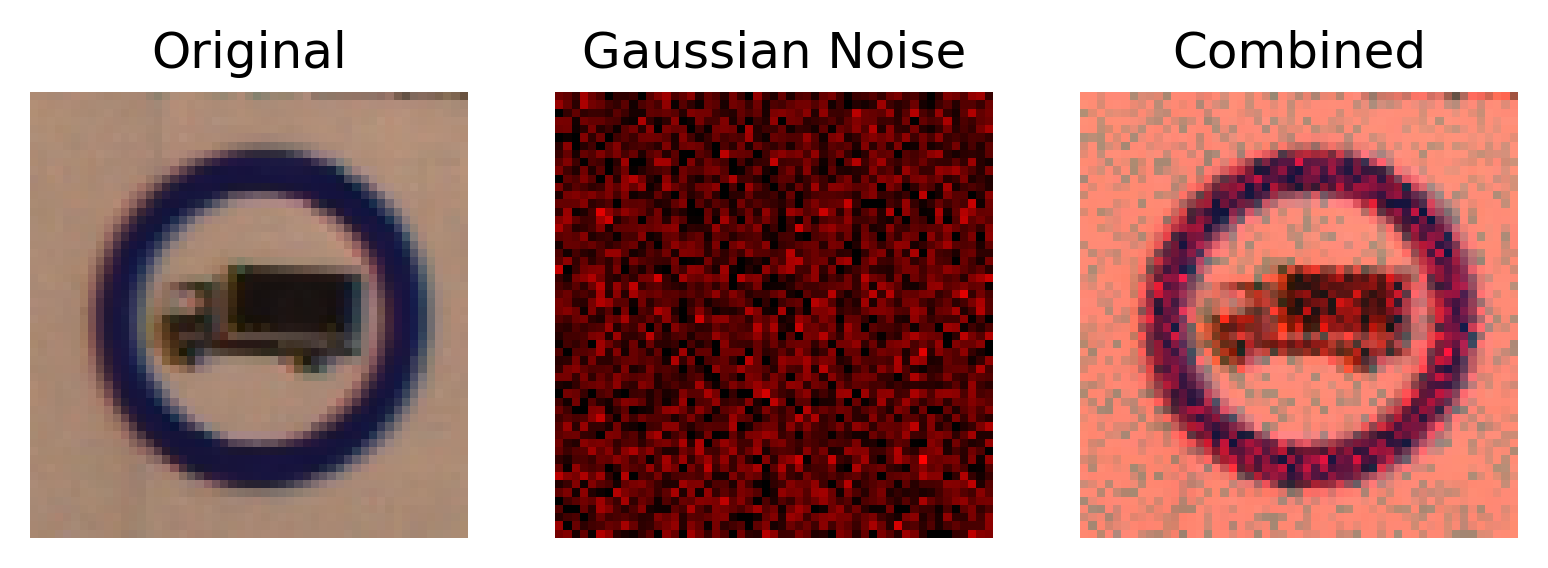

(45, 42, 3)


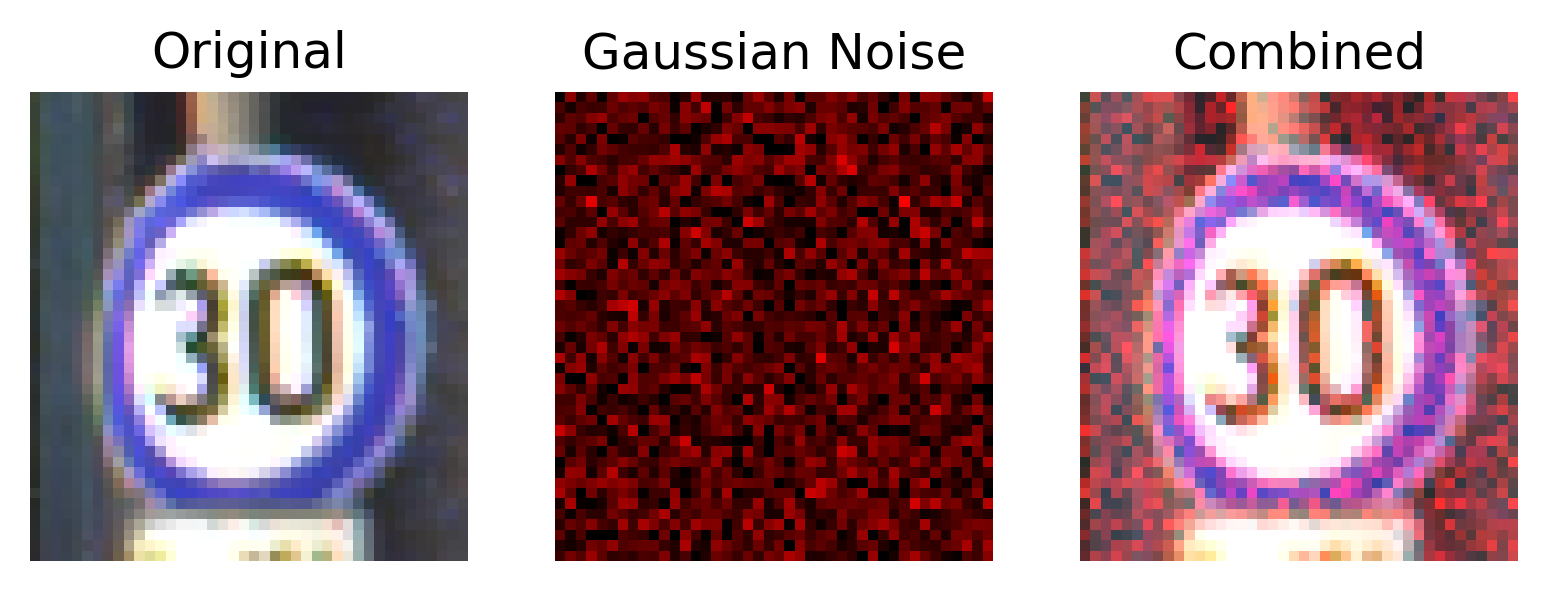

(52, 48, 3)


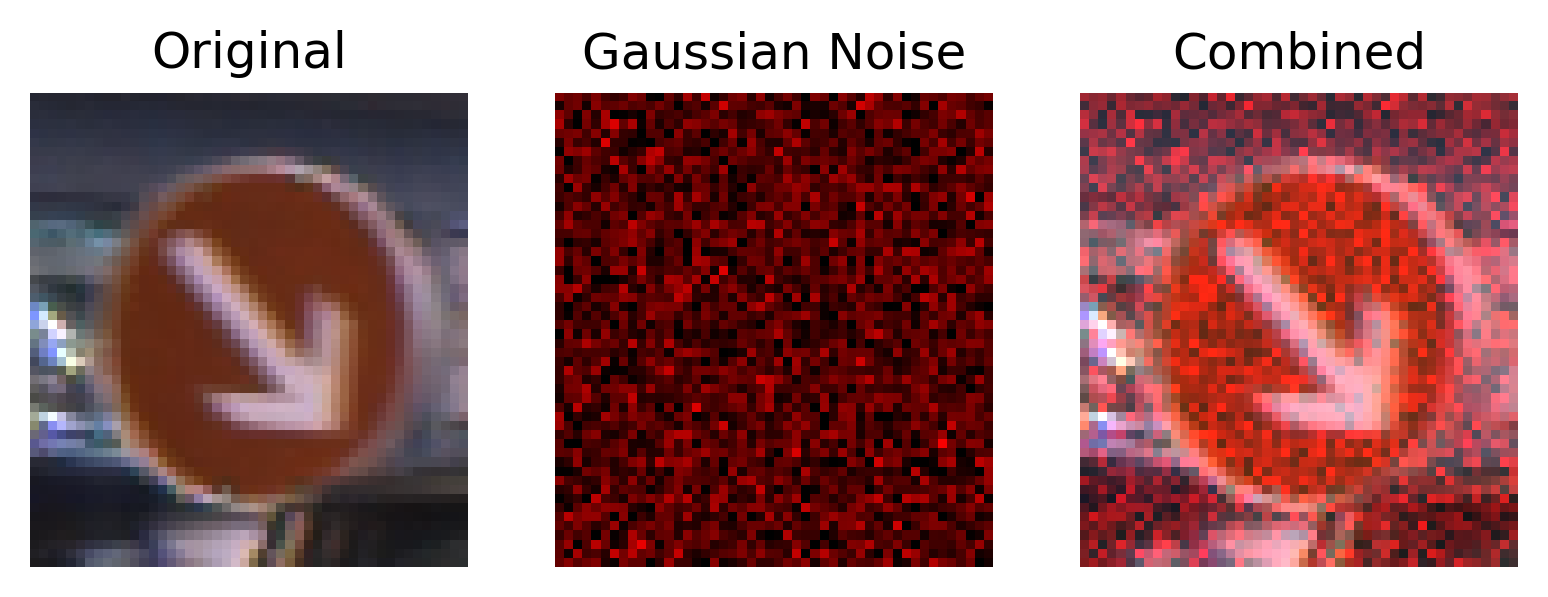

(29, 27, 3)


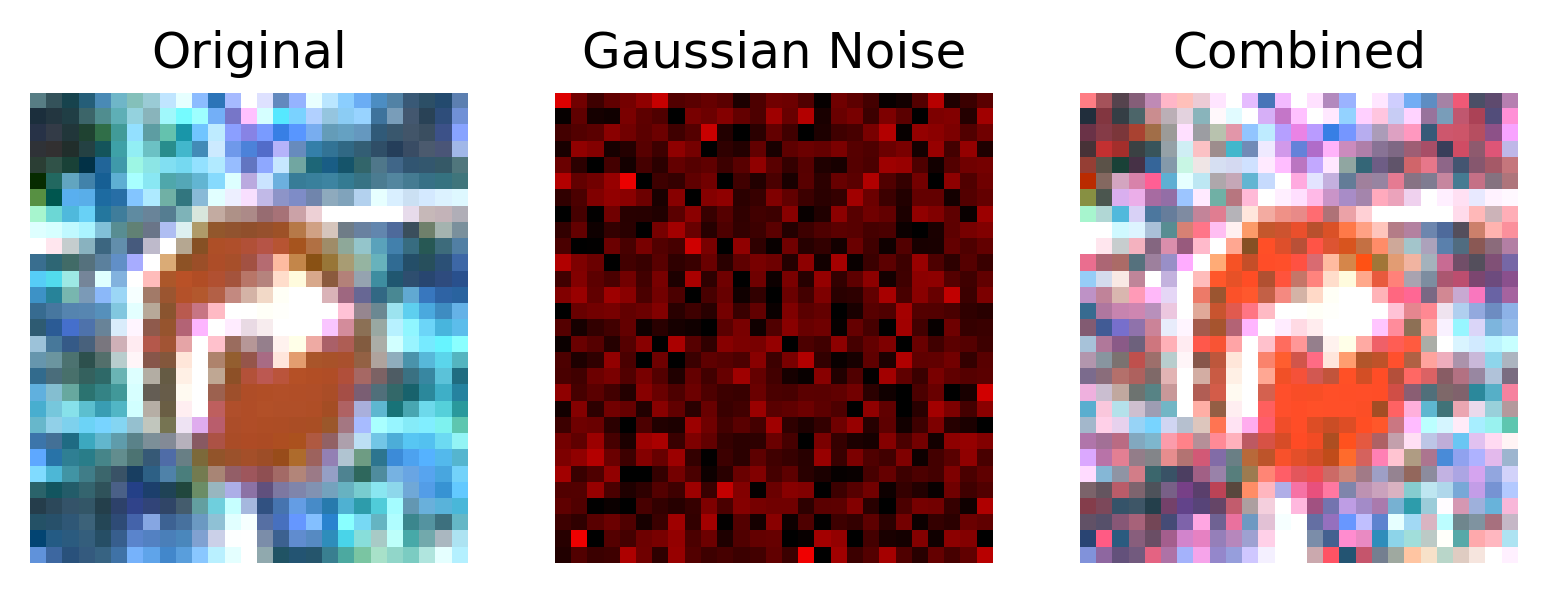

(57, 60, 3)


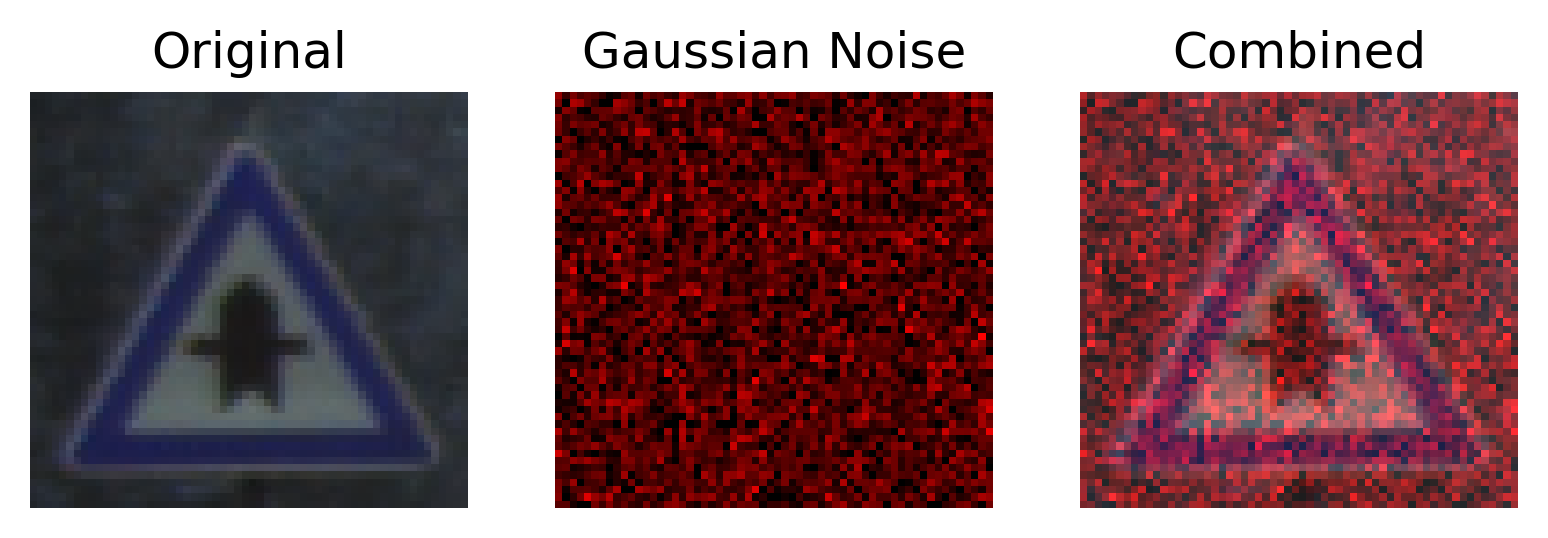

(56, 52, 3)


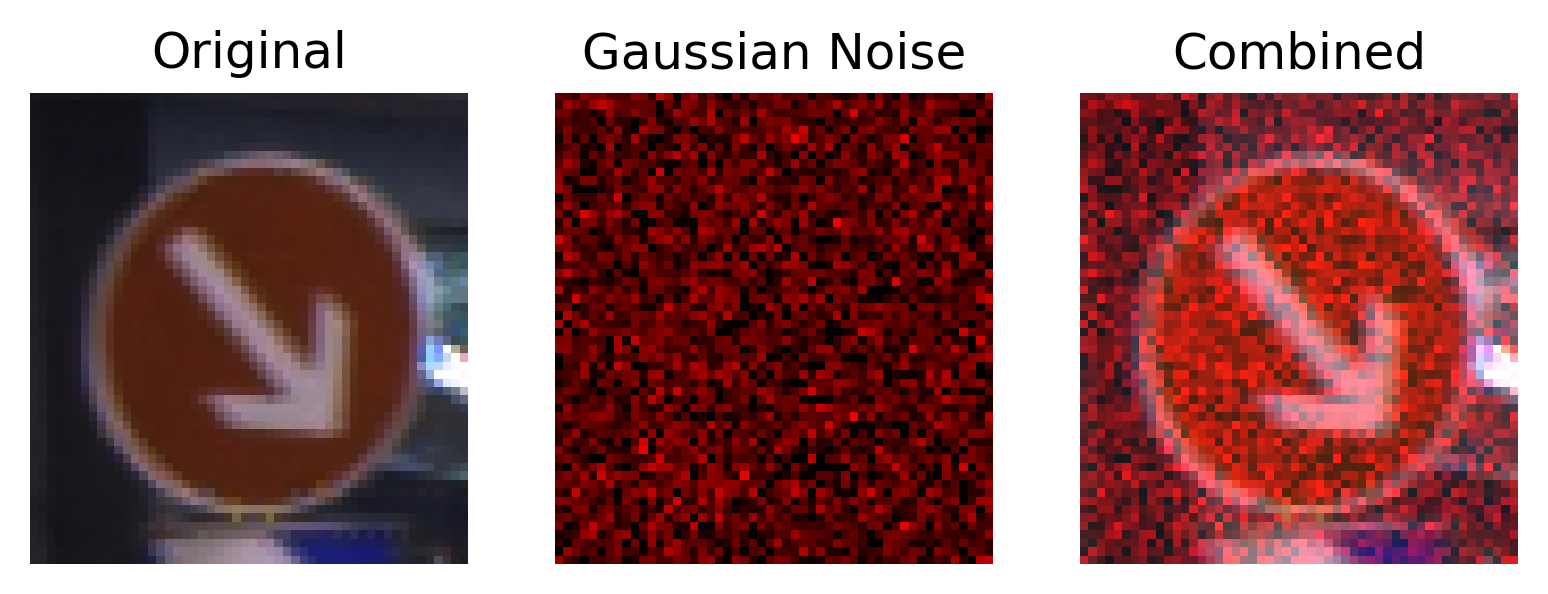

(130, 147, 3)


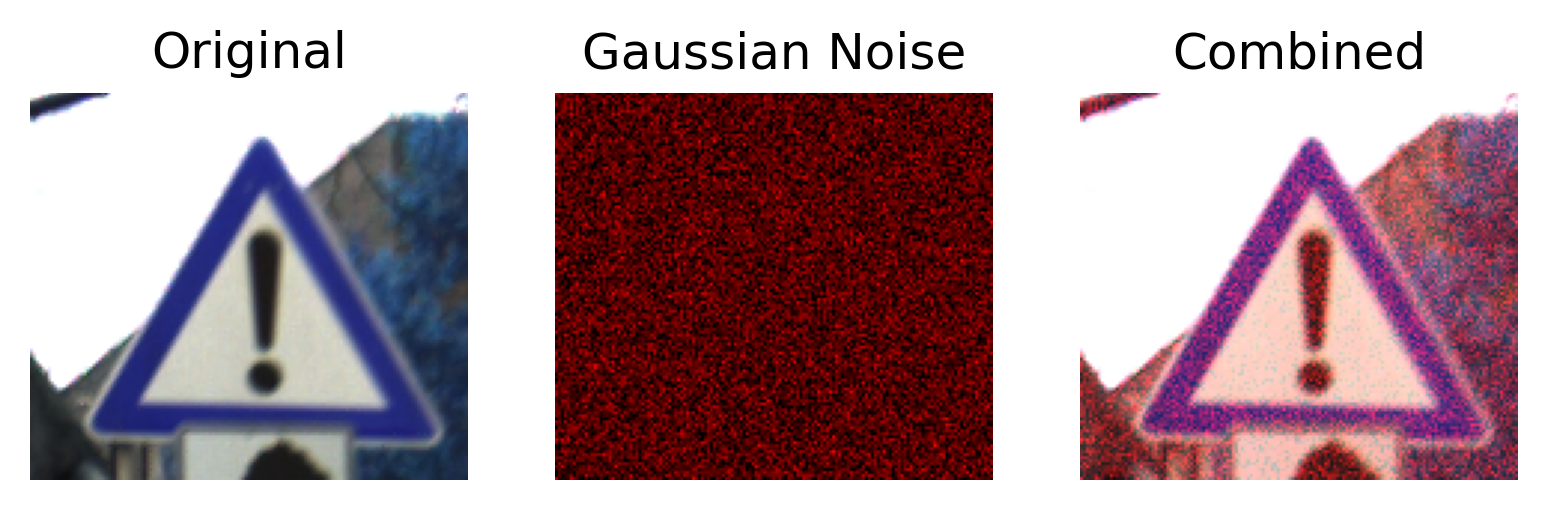

(33, 32, 3)


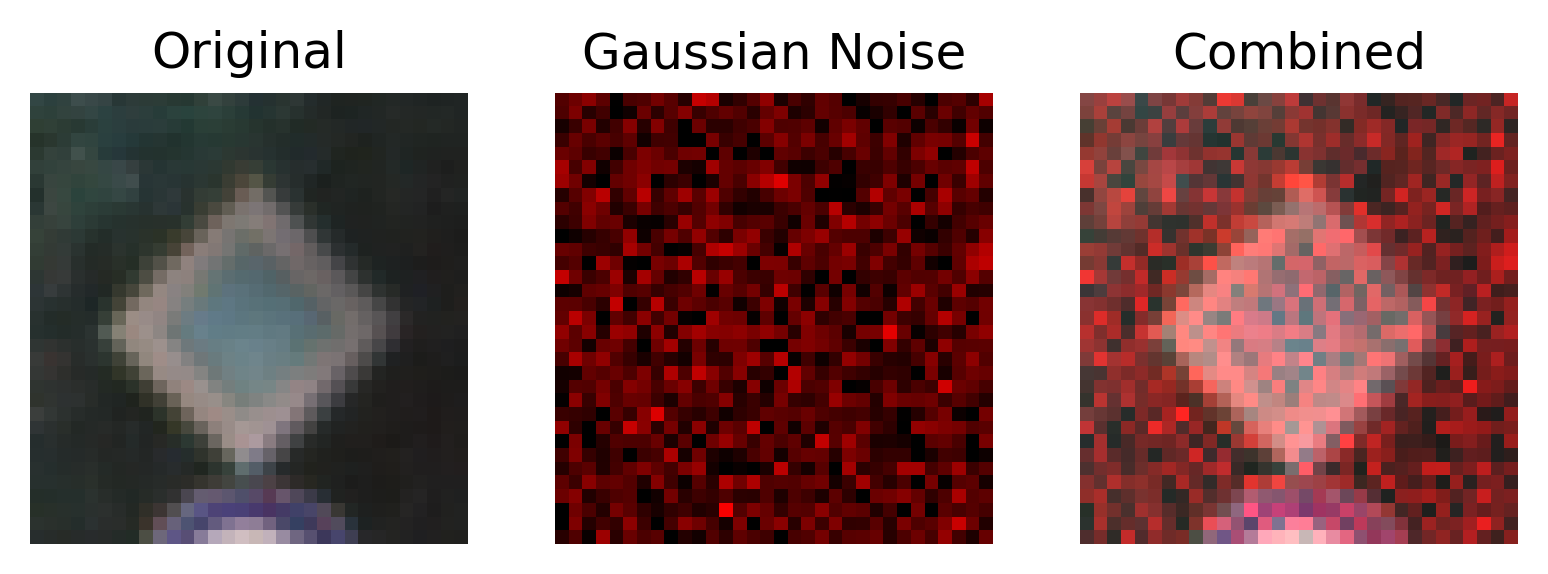

(50, 45, 3)


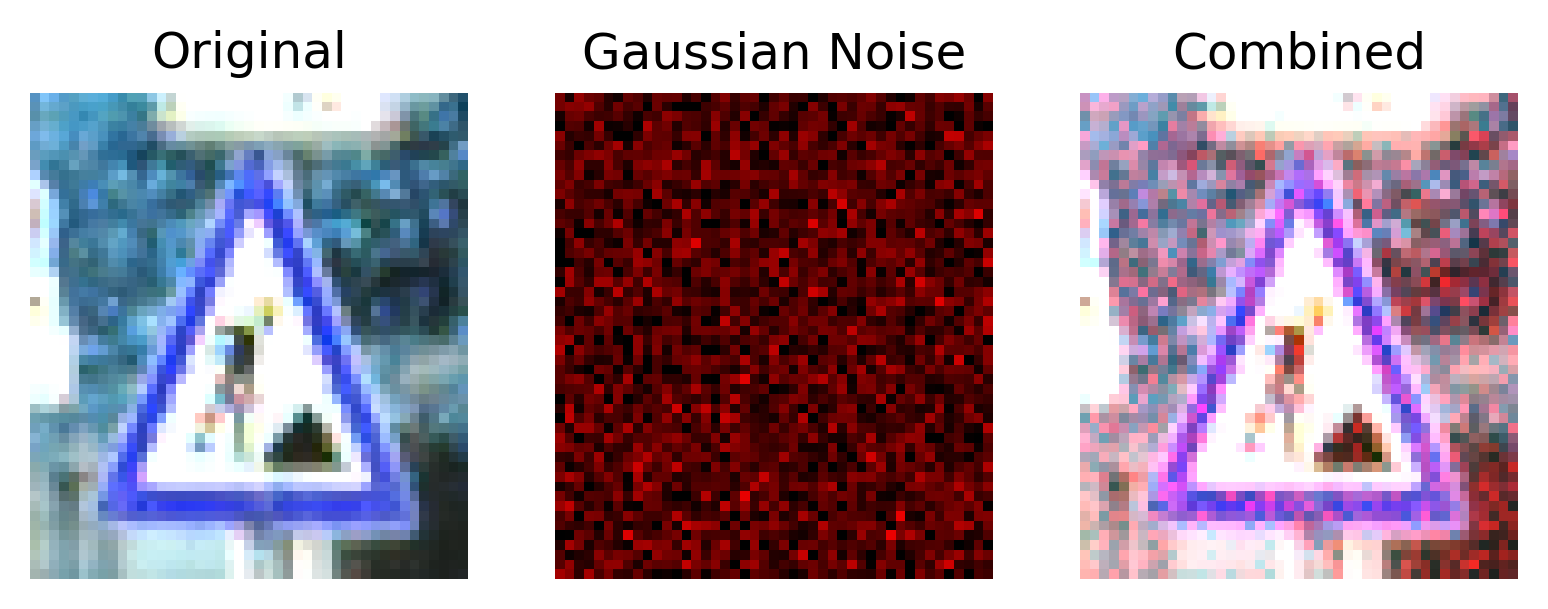

(86, 81, 3)


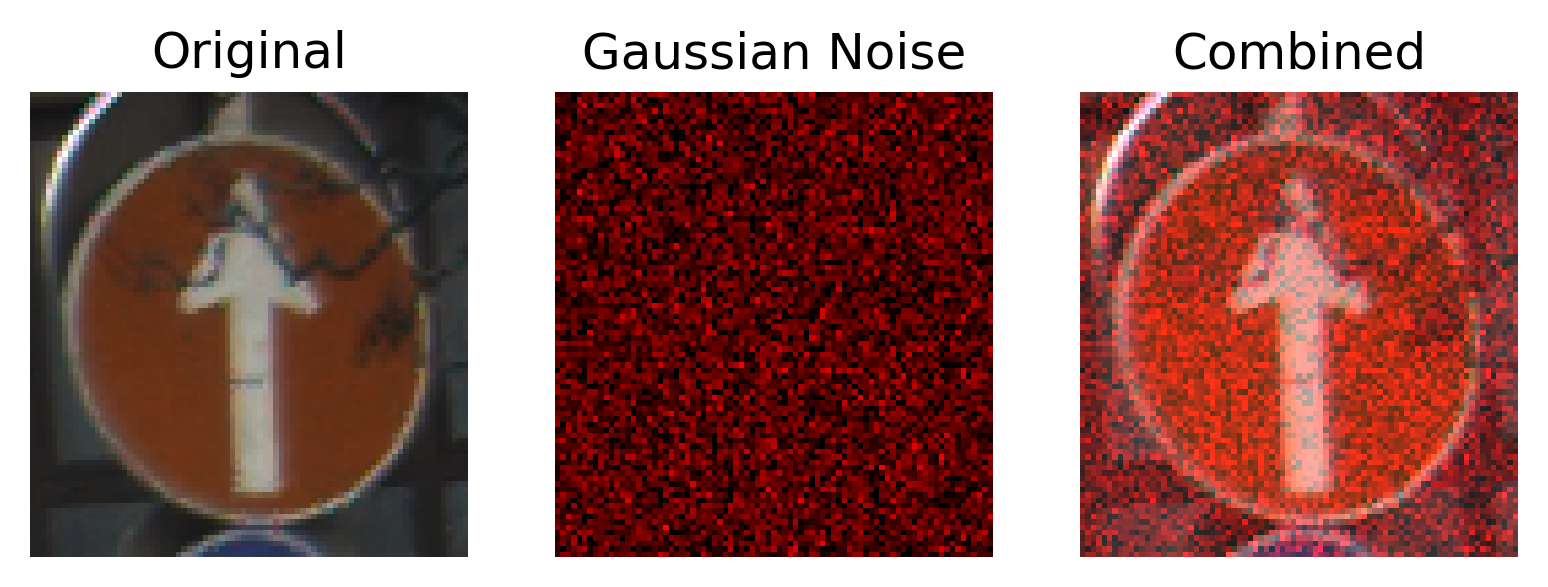

(37, 38, 3)


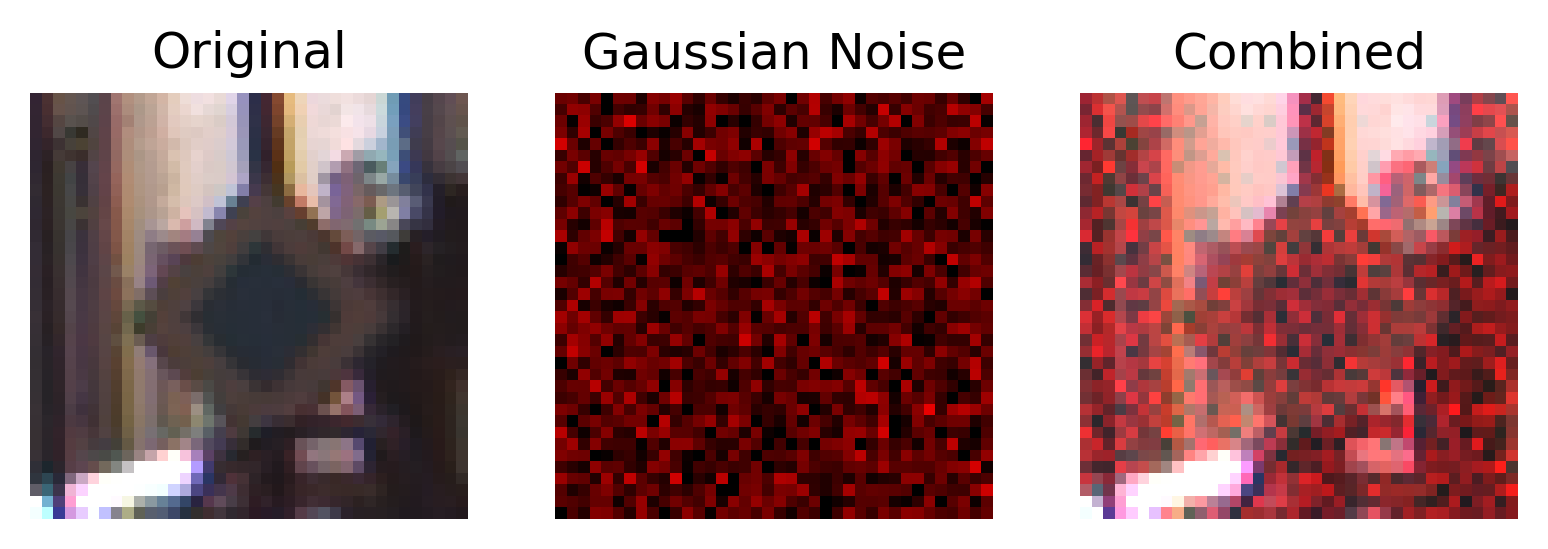

(44, 45, 3)


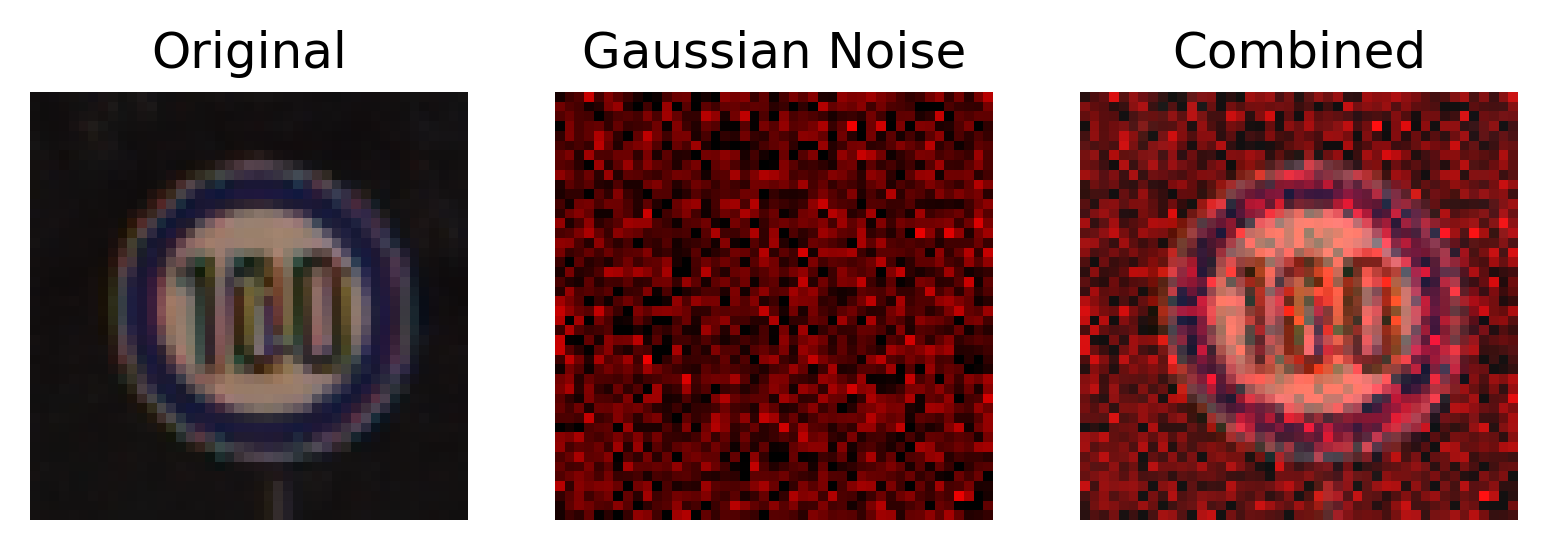

(73, 79, 3)


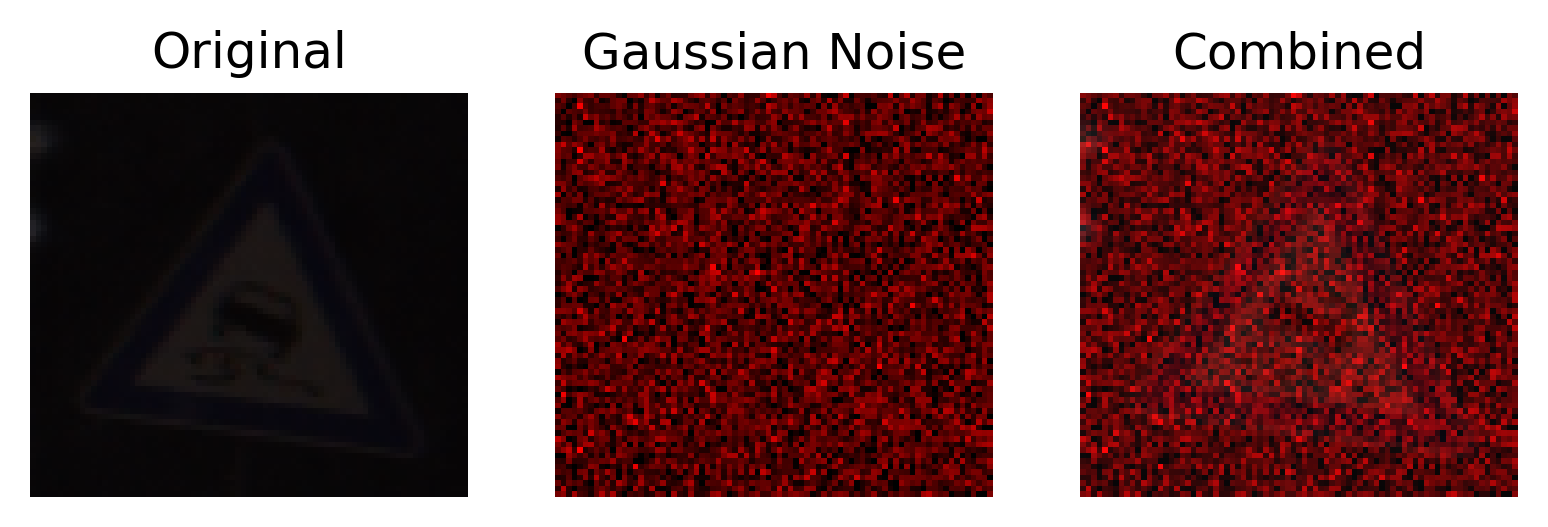

(37, 36, 3)


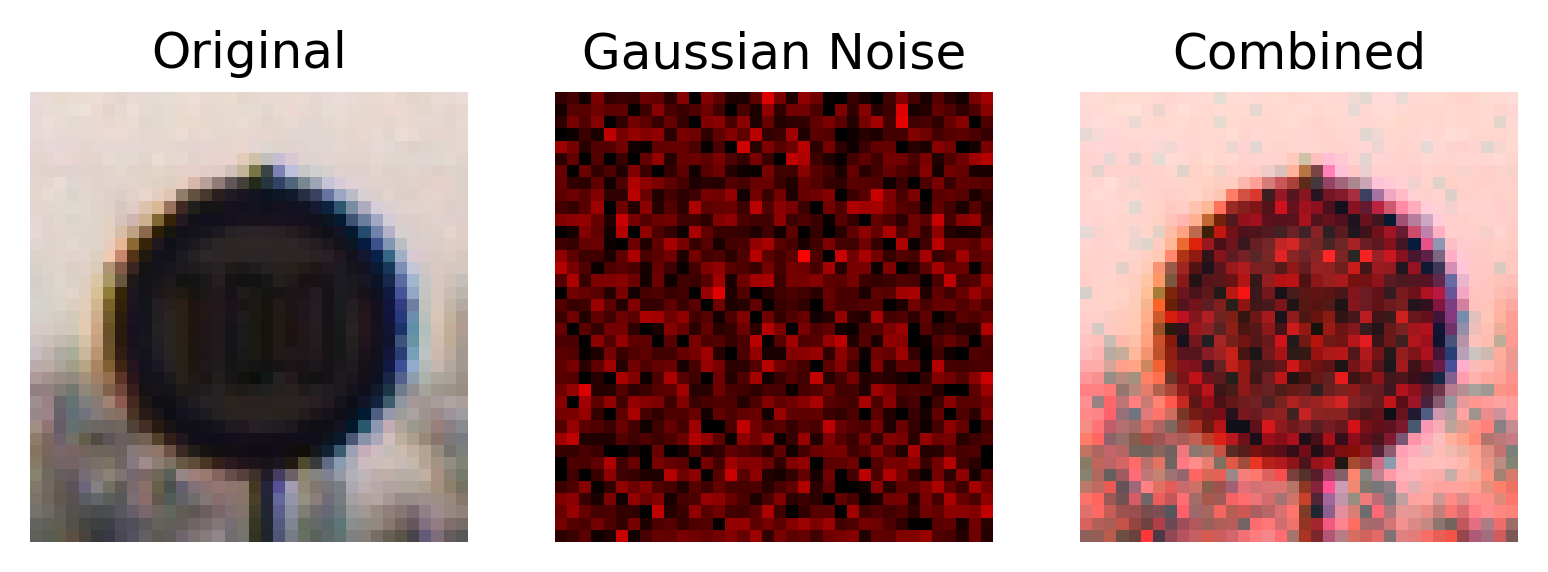

(41, 43, 3)


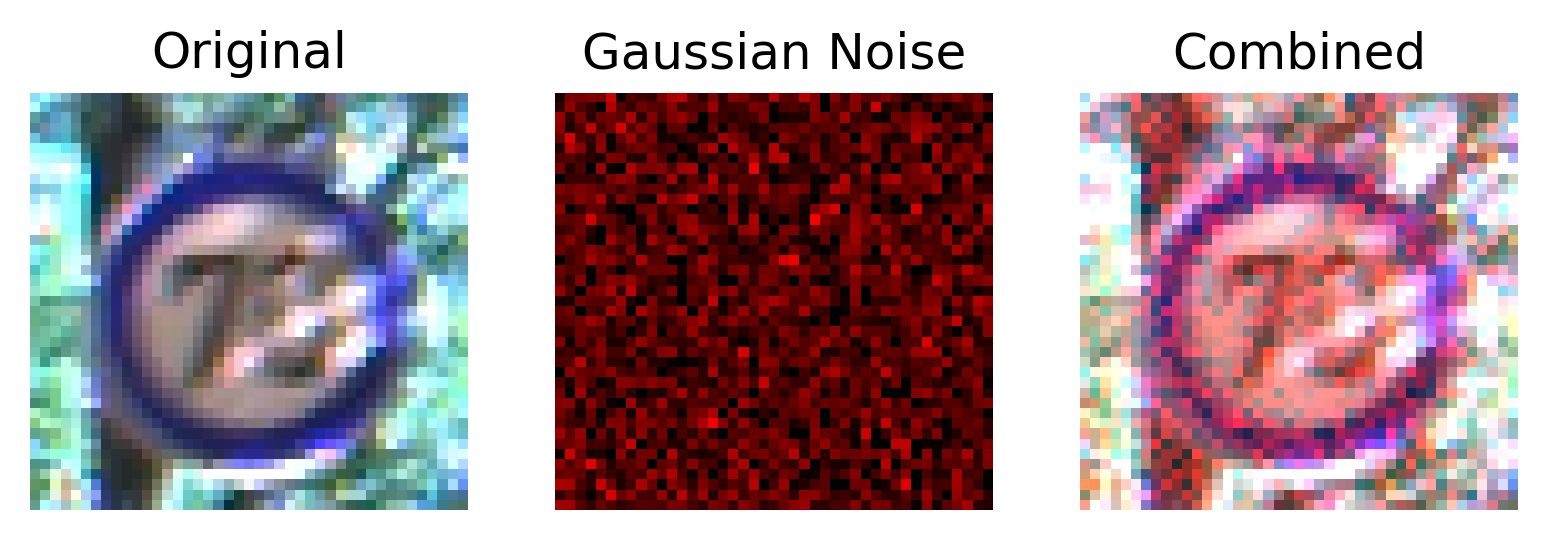

(27, 27, 3)


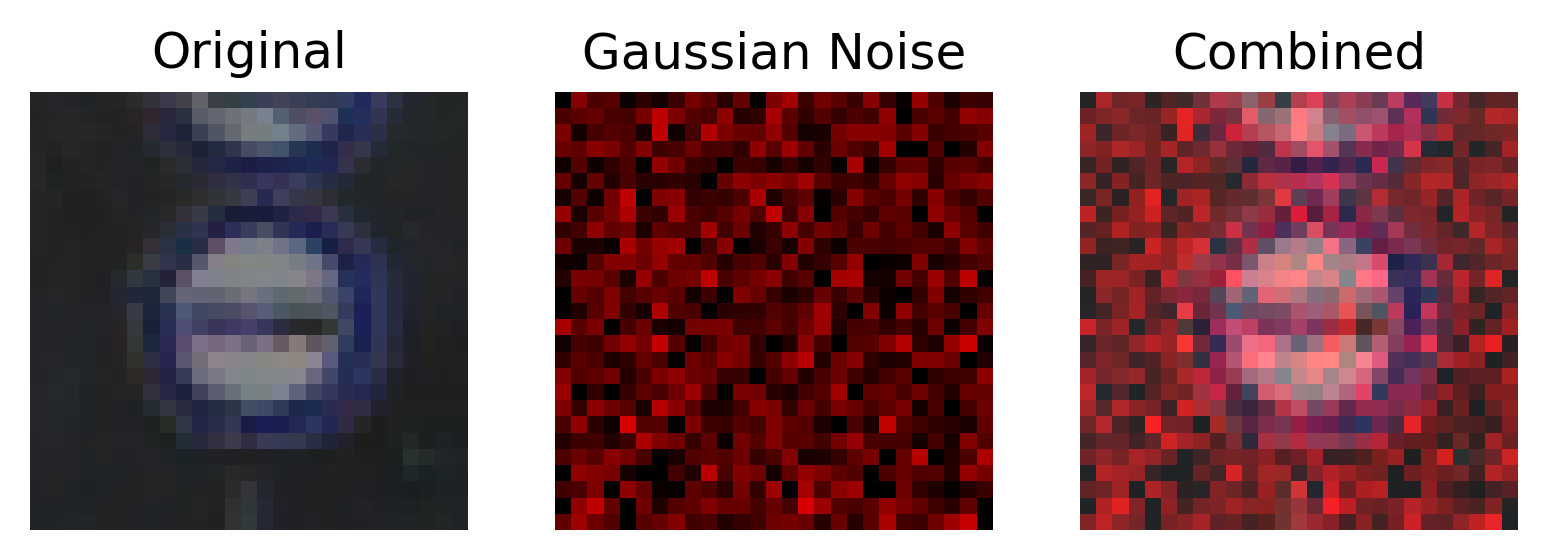

(38, 37, 3)


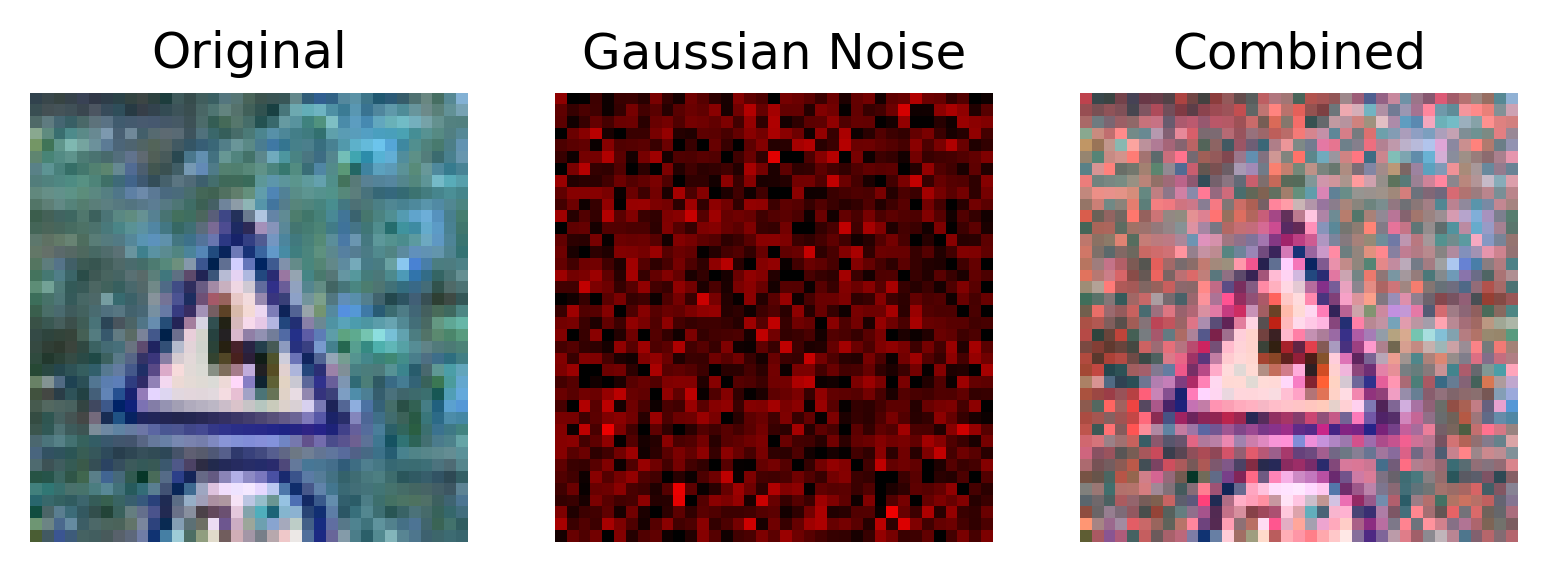

(33, 32, 3)


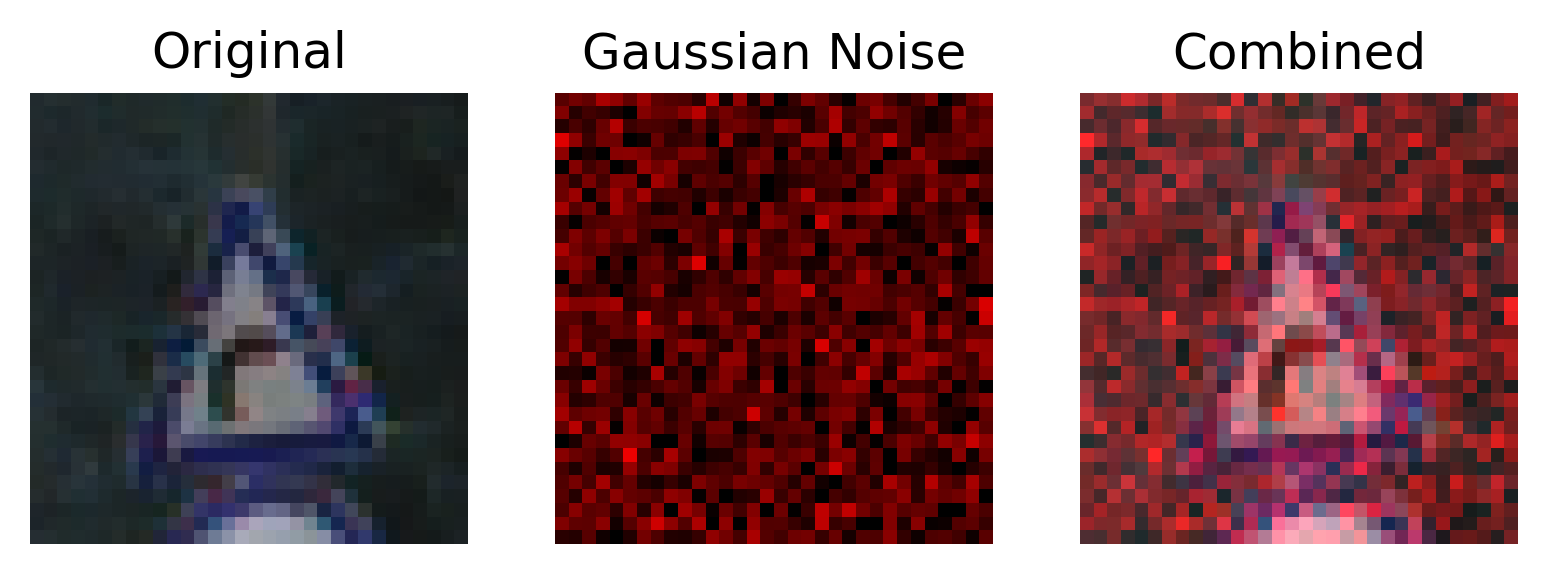

(35, 35, 3)


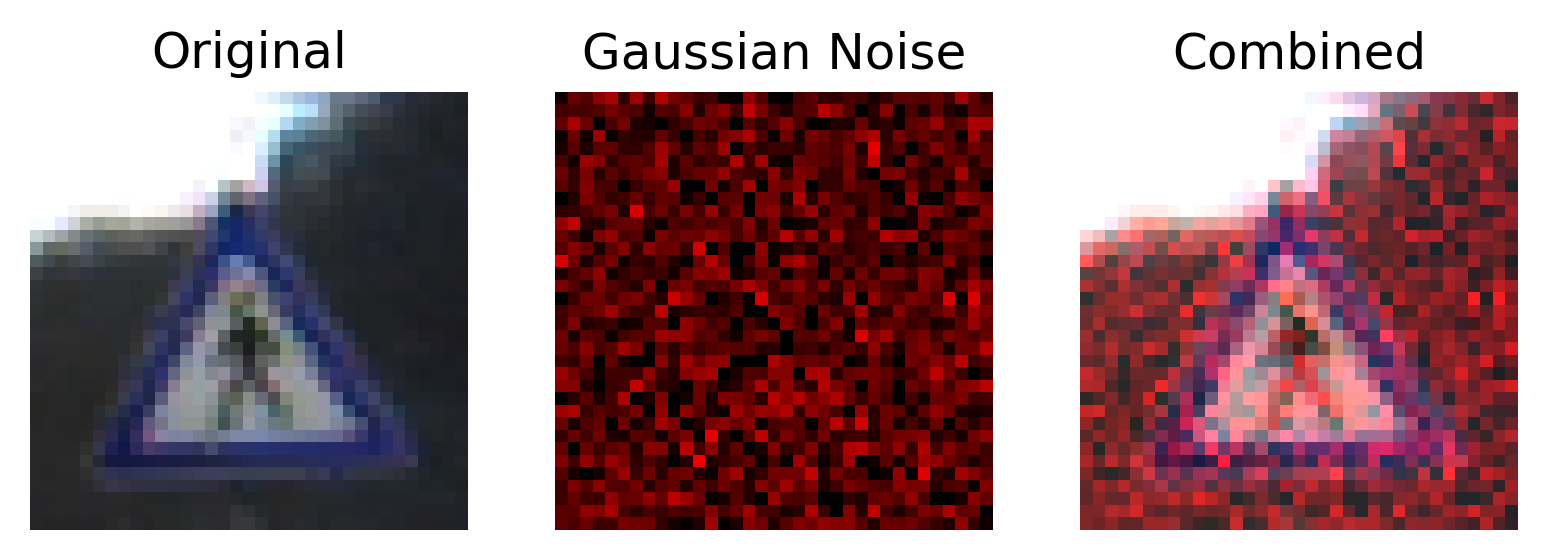

(40, 34, 3)


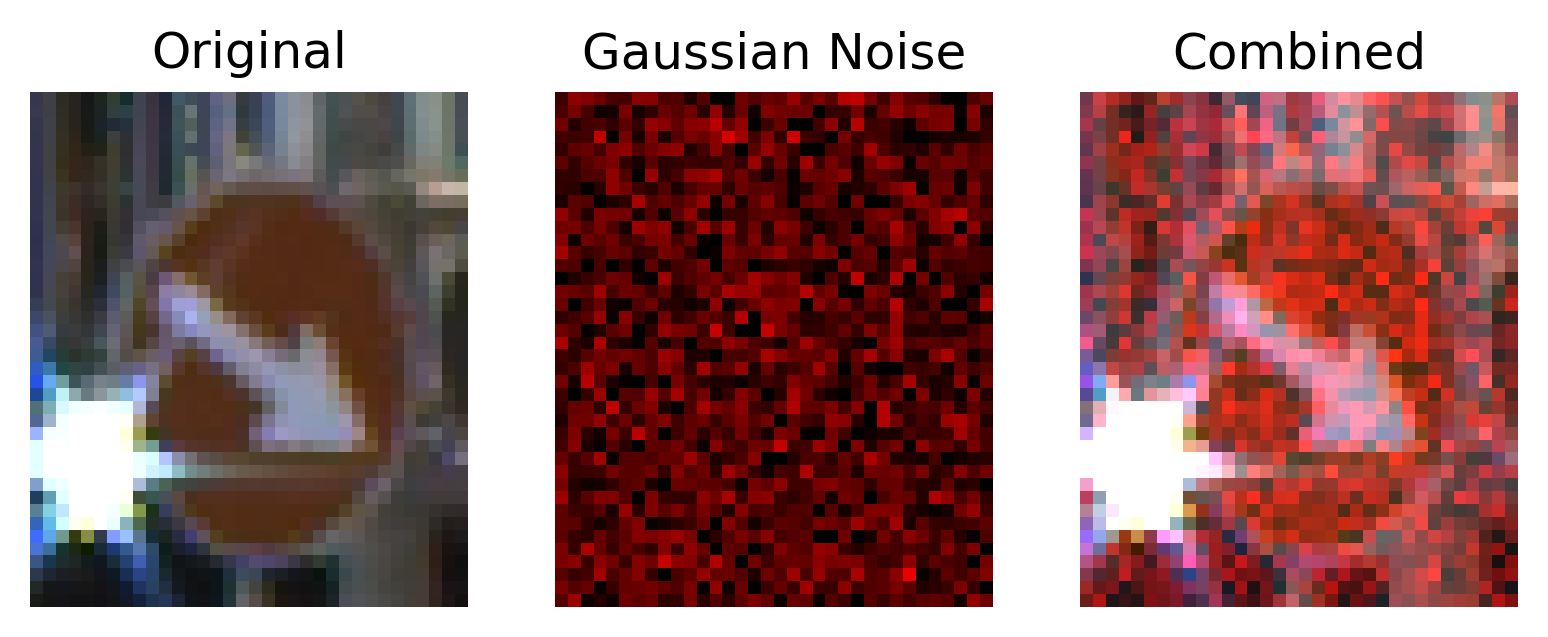

(33, 32, 3)


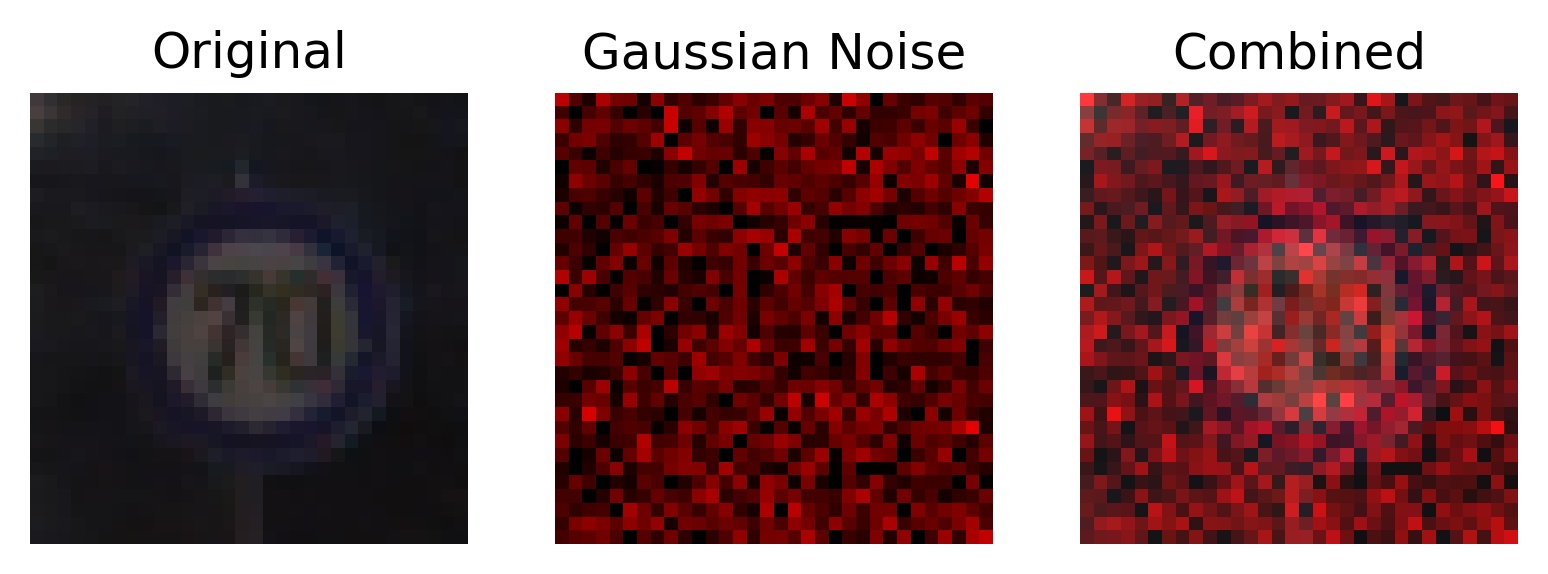

(55, 52, 3)


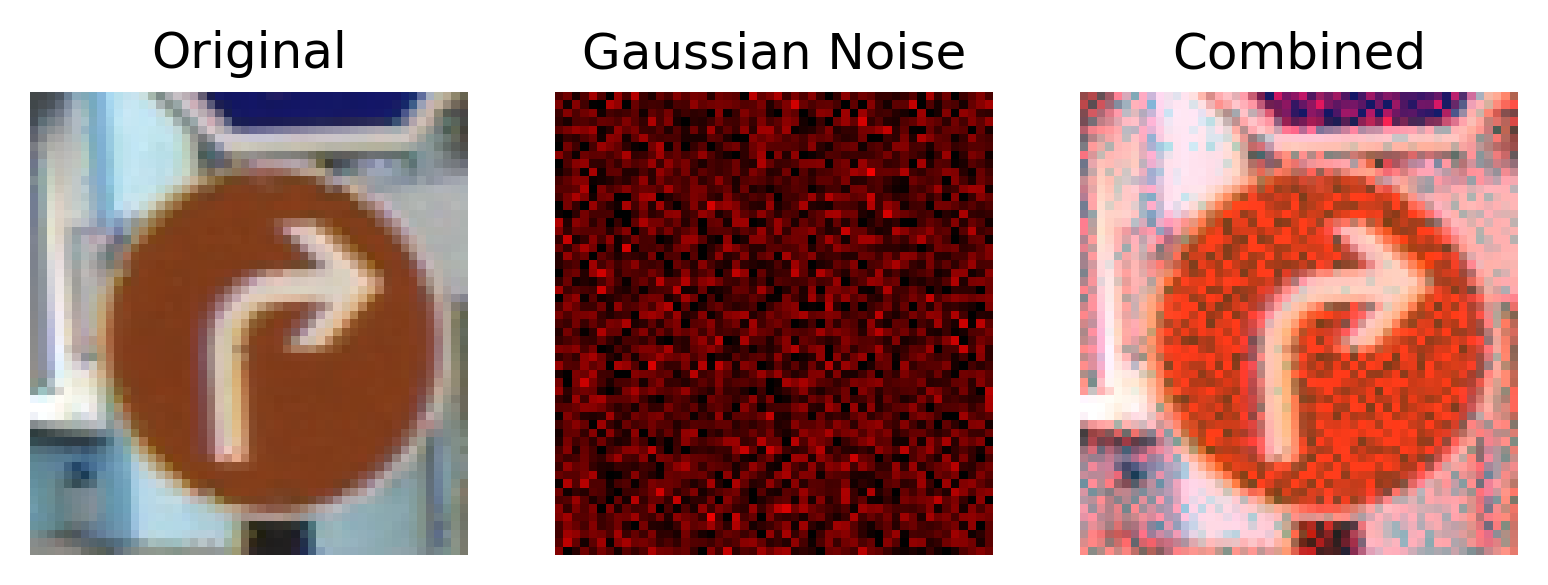

(120, 116, 3)


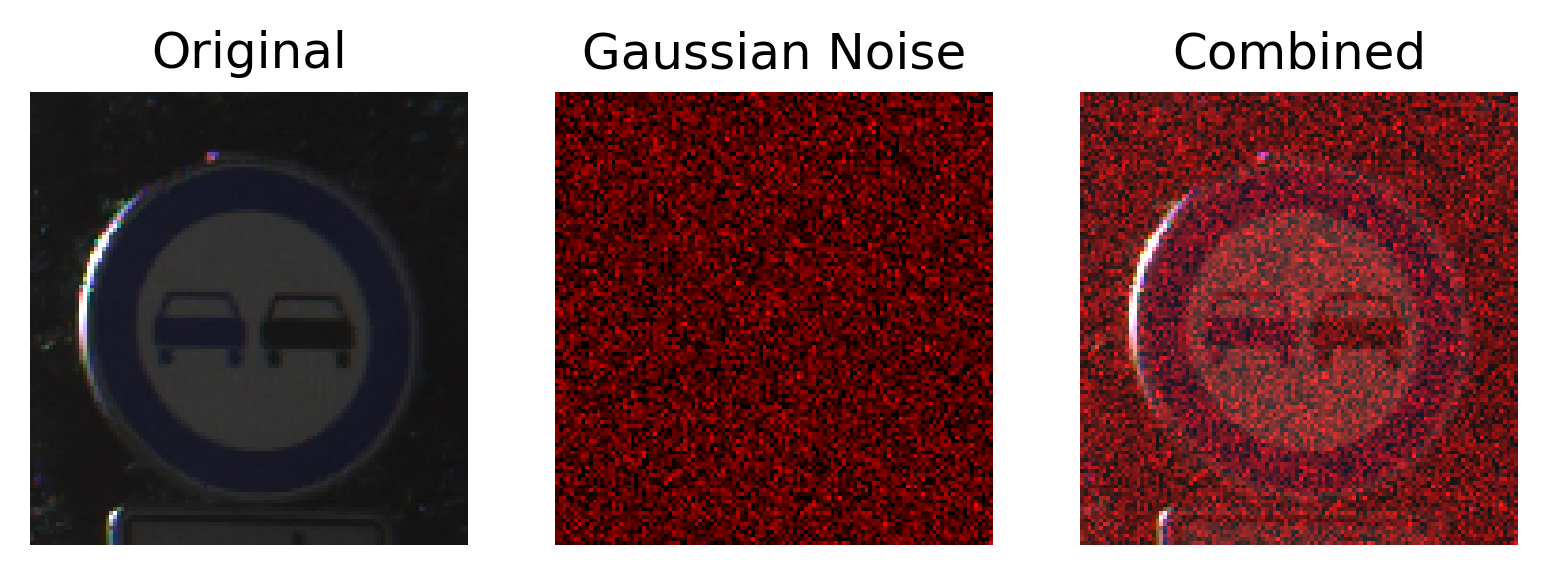

(33, 32, 3)


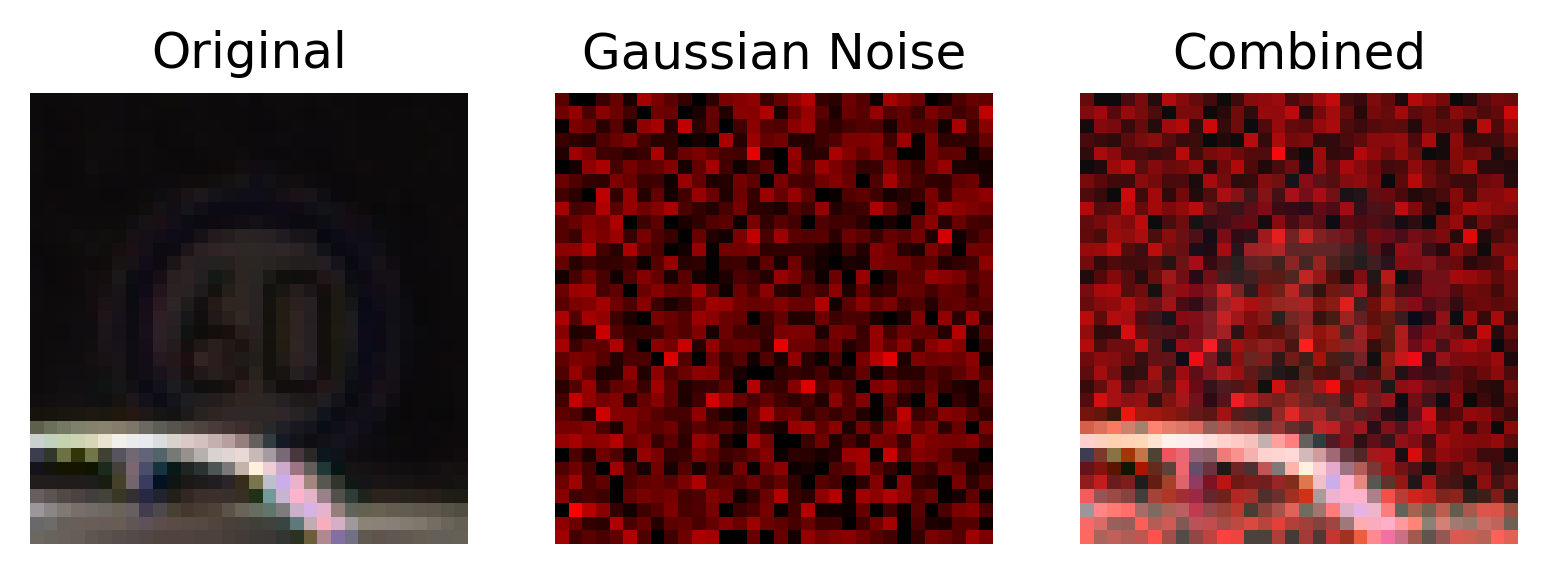

(65, 59, 3)


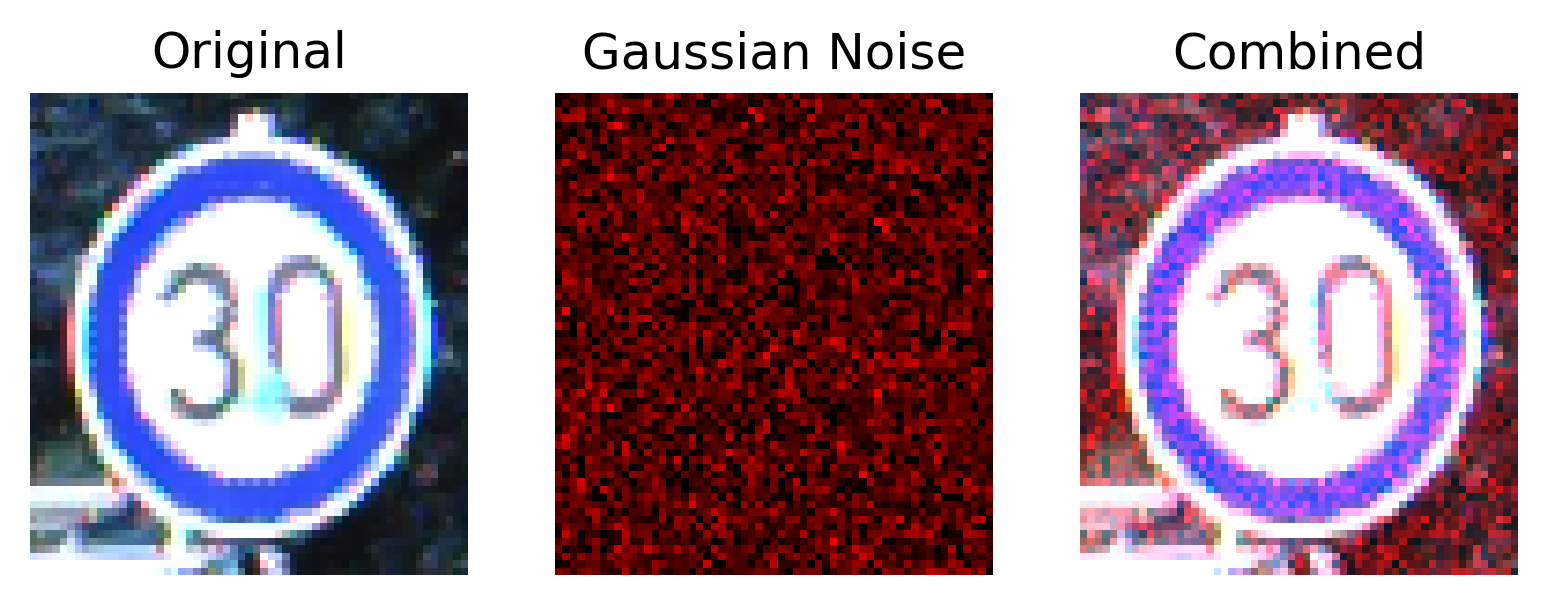

(34, 35, 3)


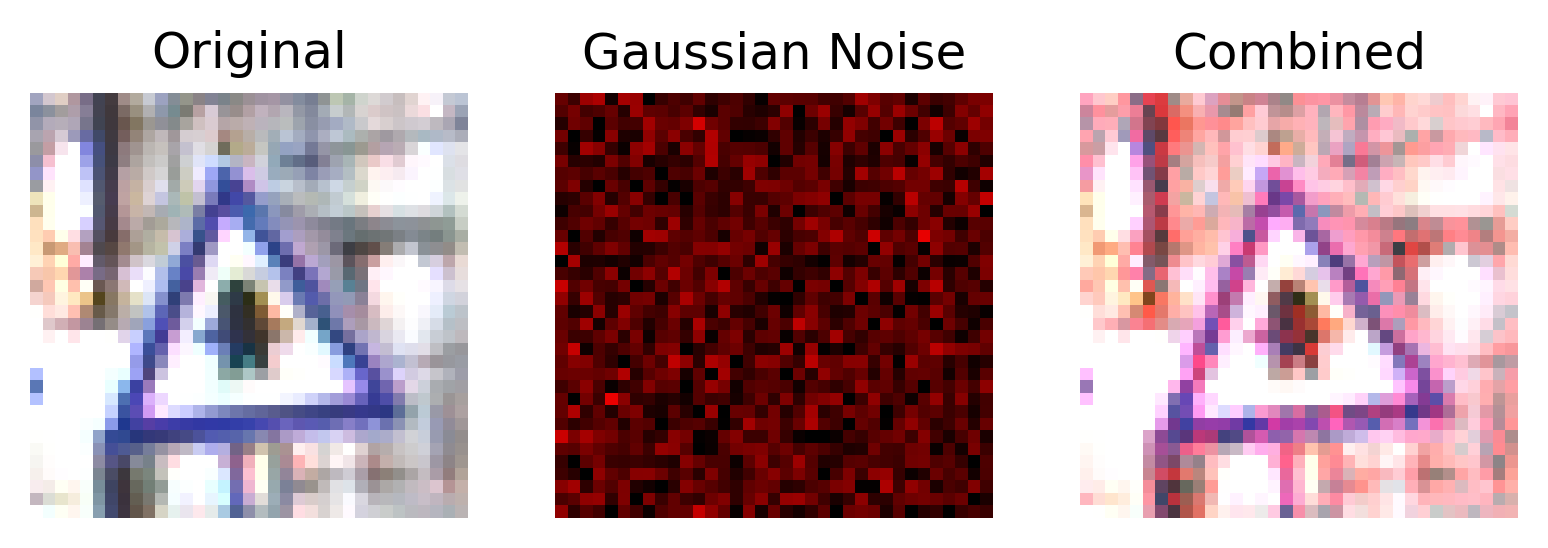

(49, 56, 3)


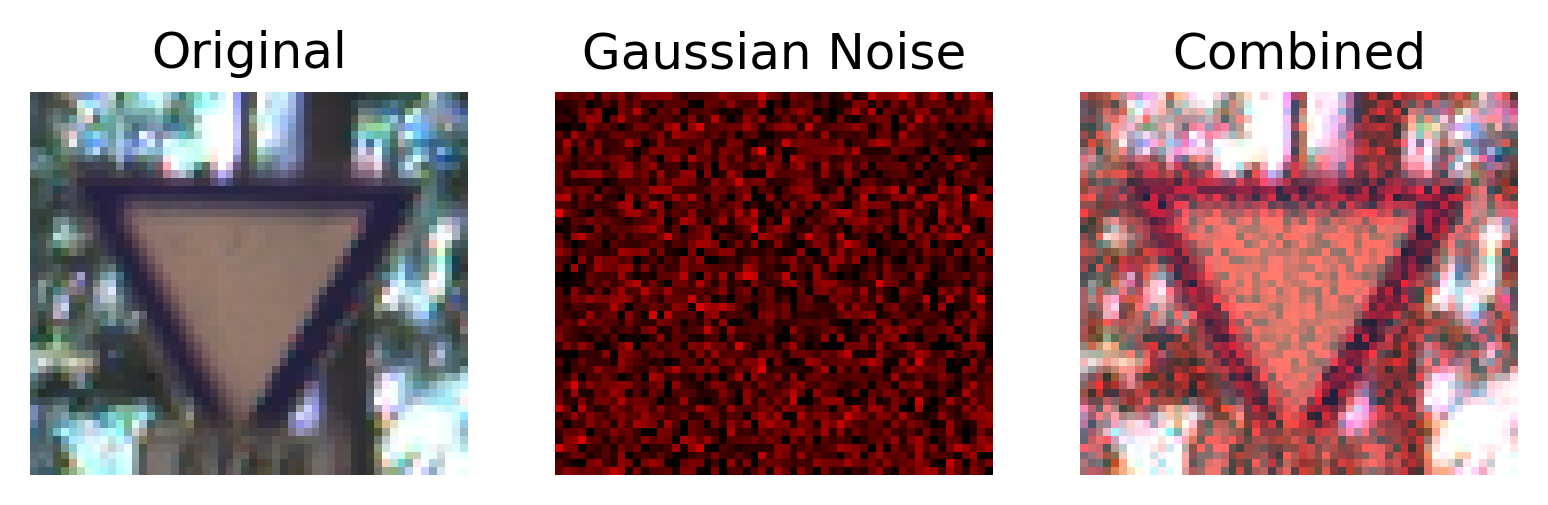

(29, 28, 3)


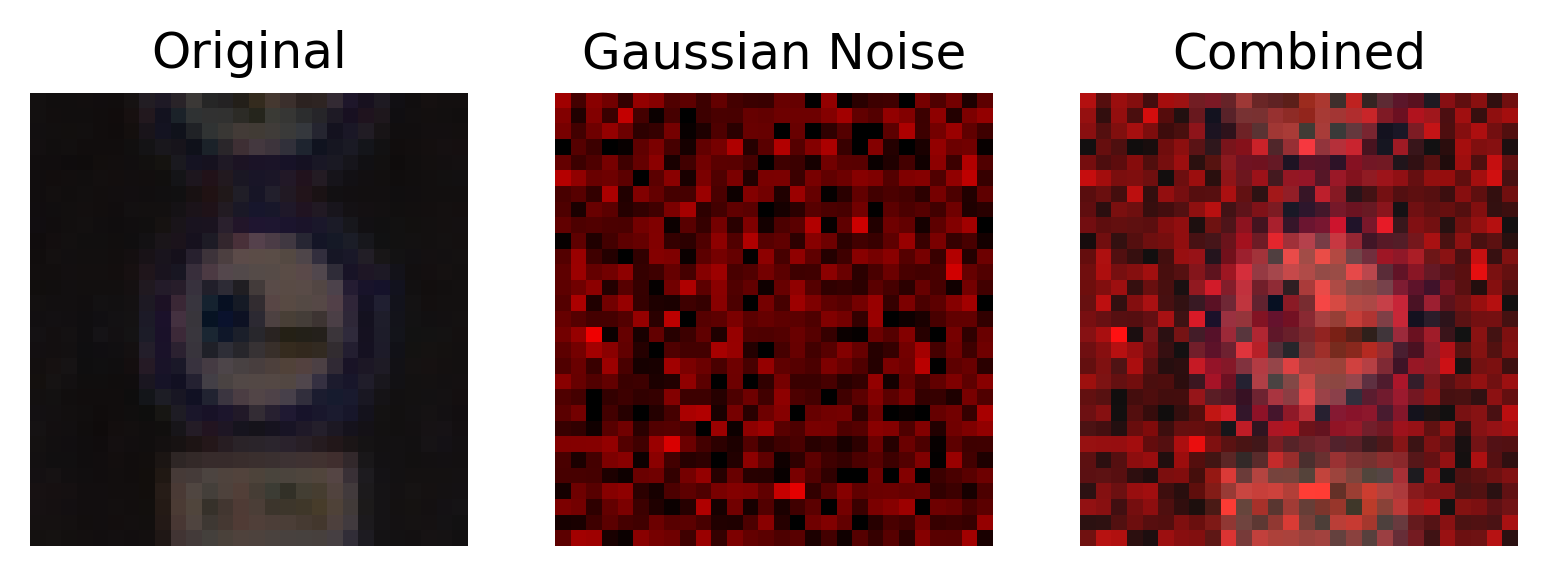

(36, 34, 3)


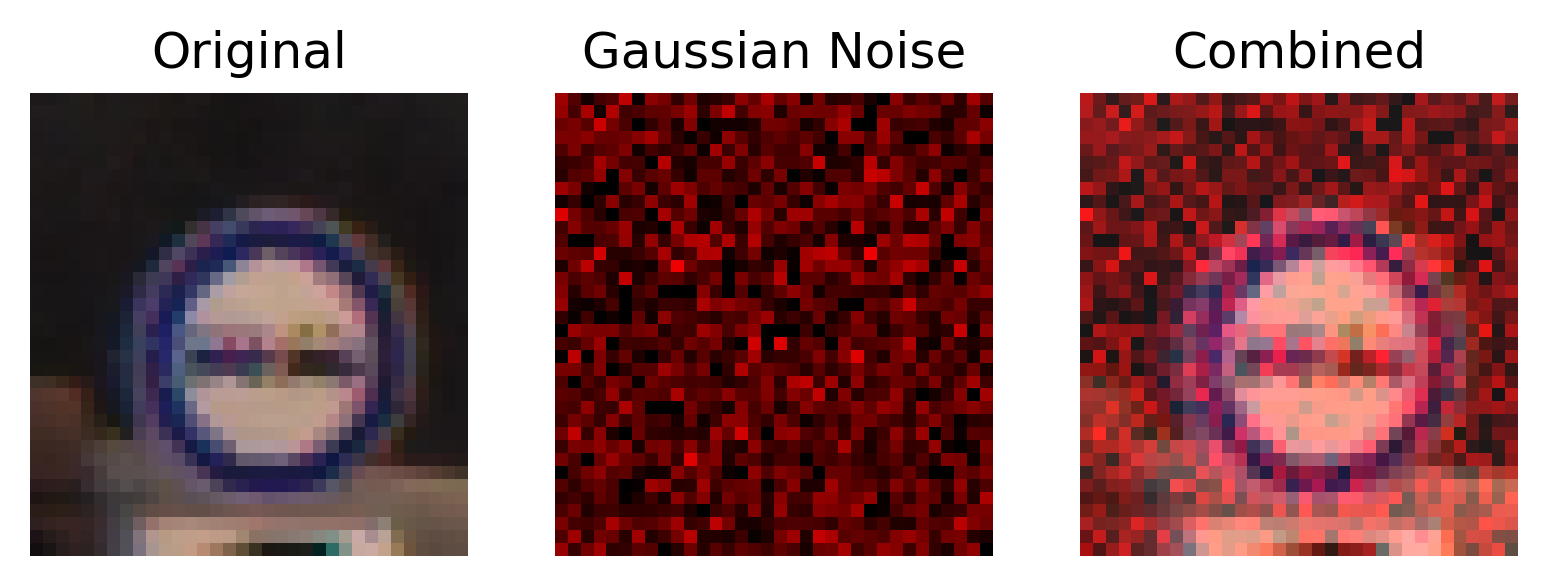

(35, 38, 3)


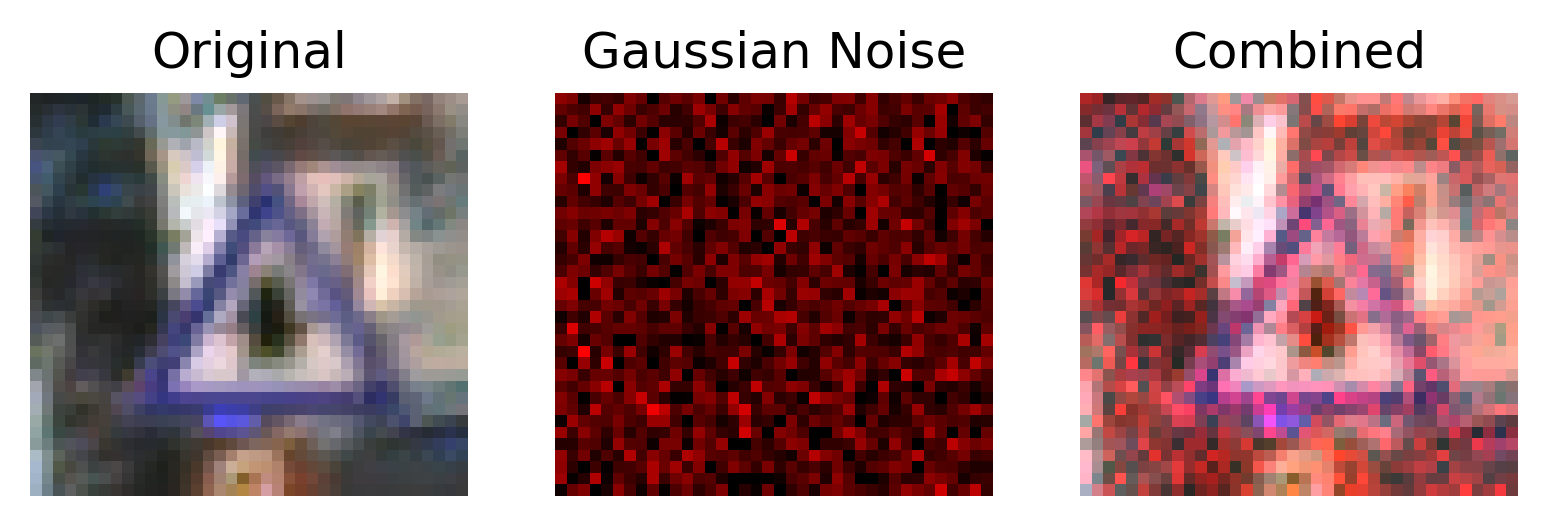

(40, 40, 3)


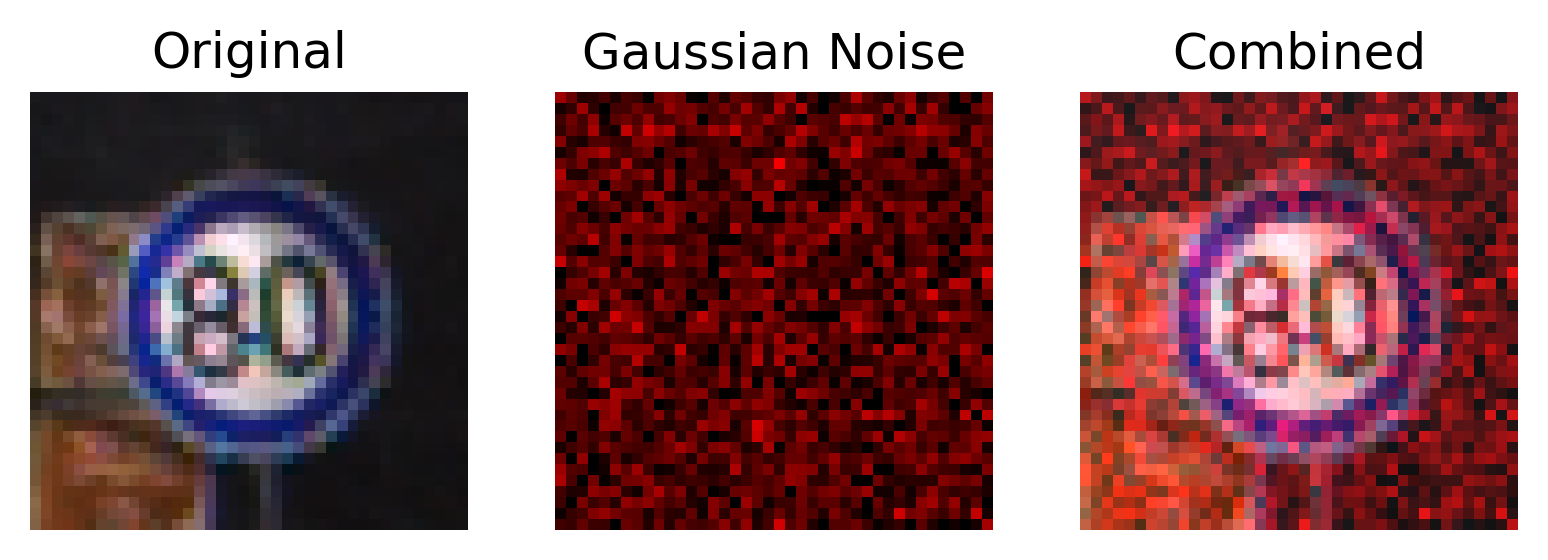

(34, 29, 3)


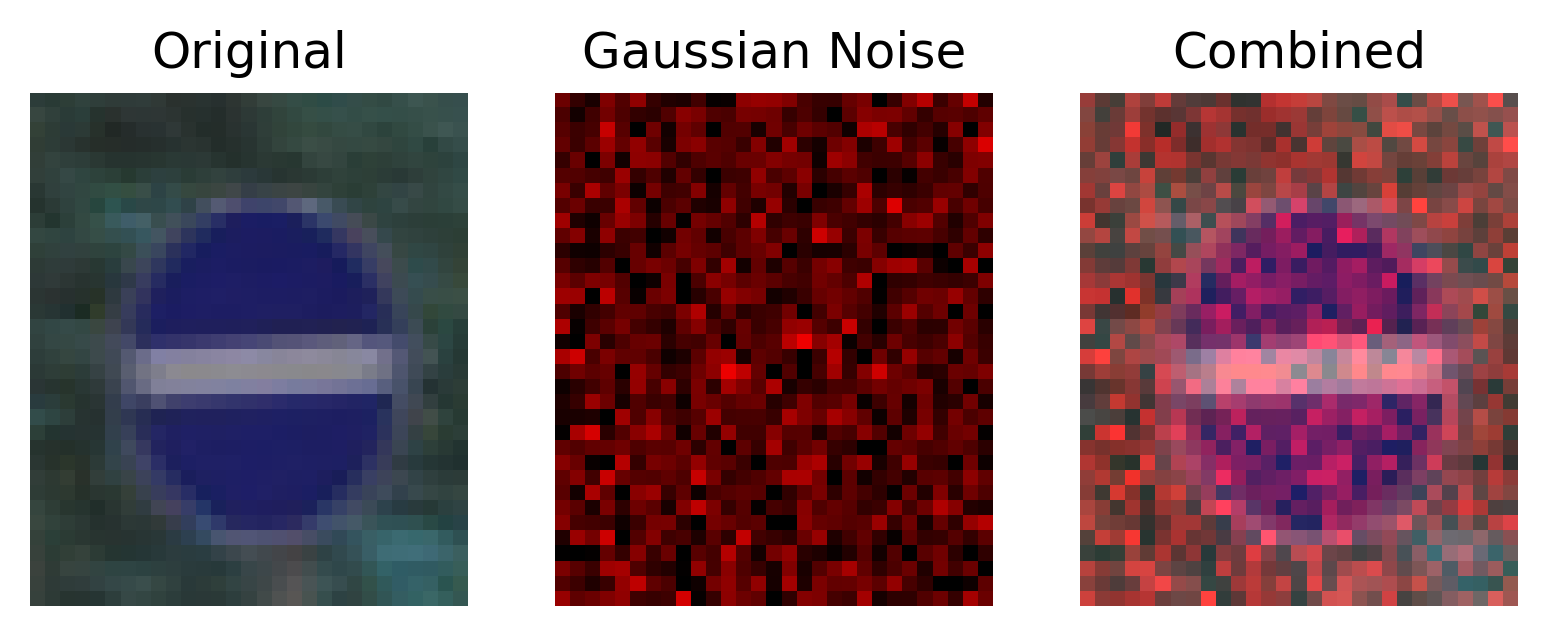

(54, 53, 3)


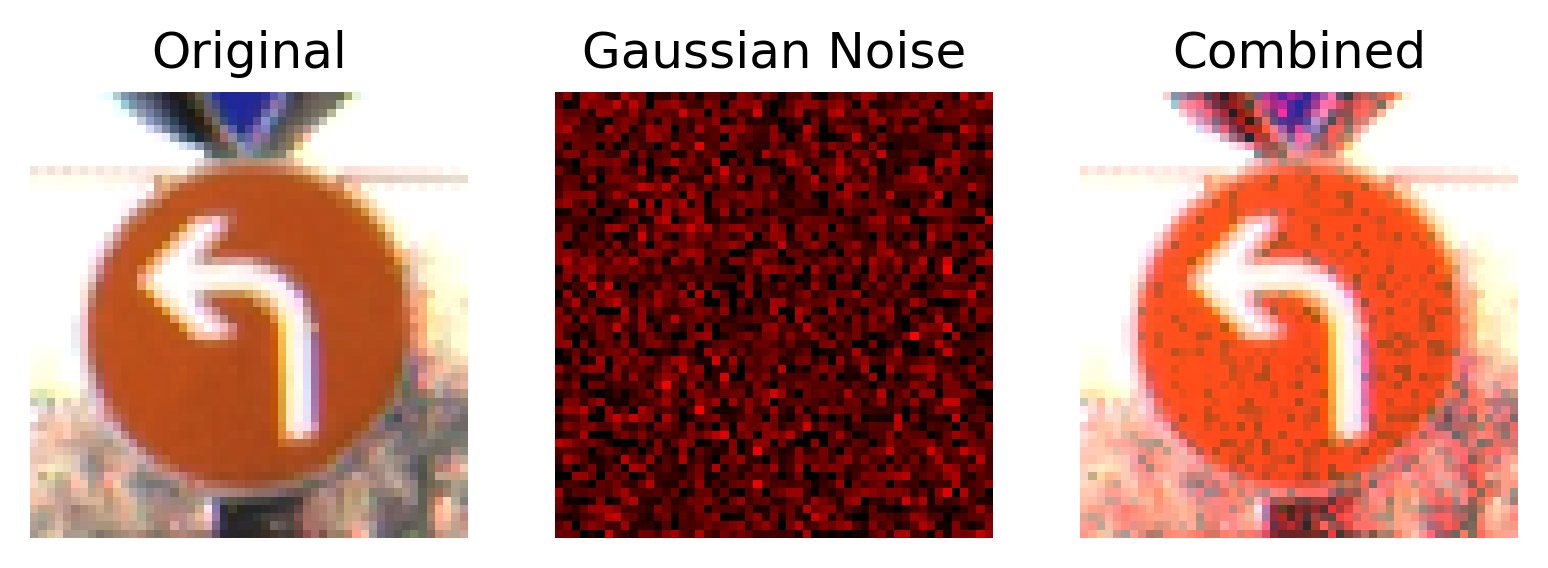

(47, 50, 3)


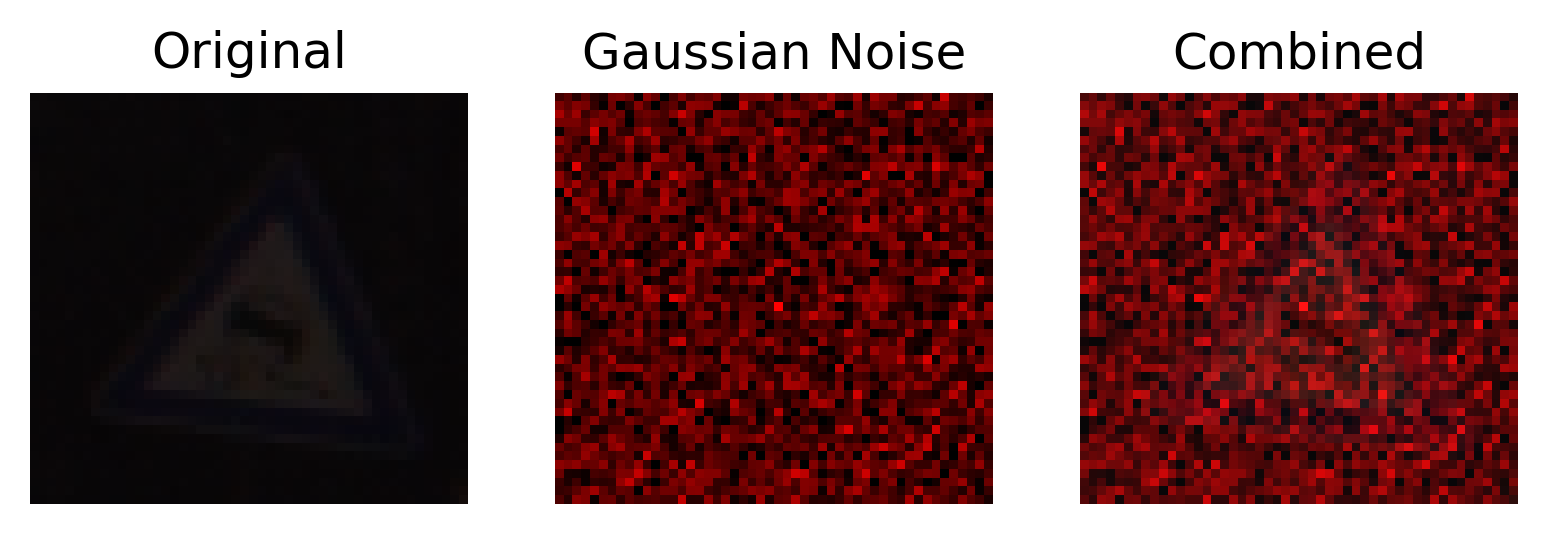

(59, 58, 3)


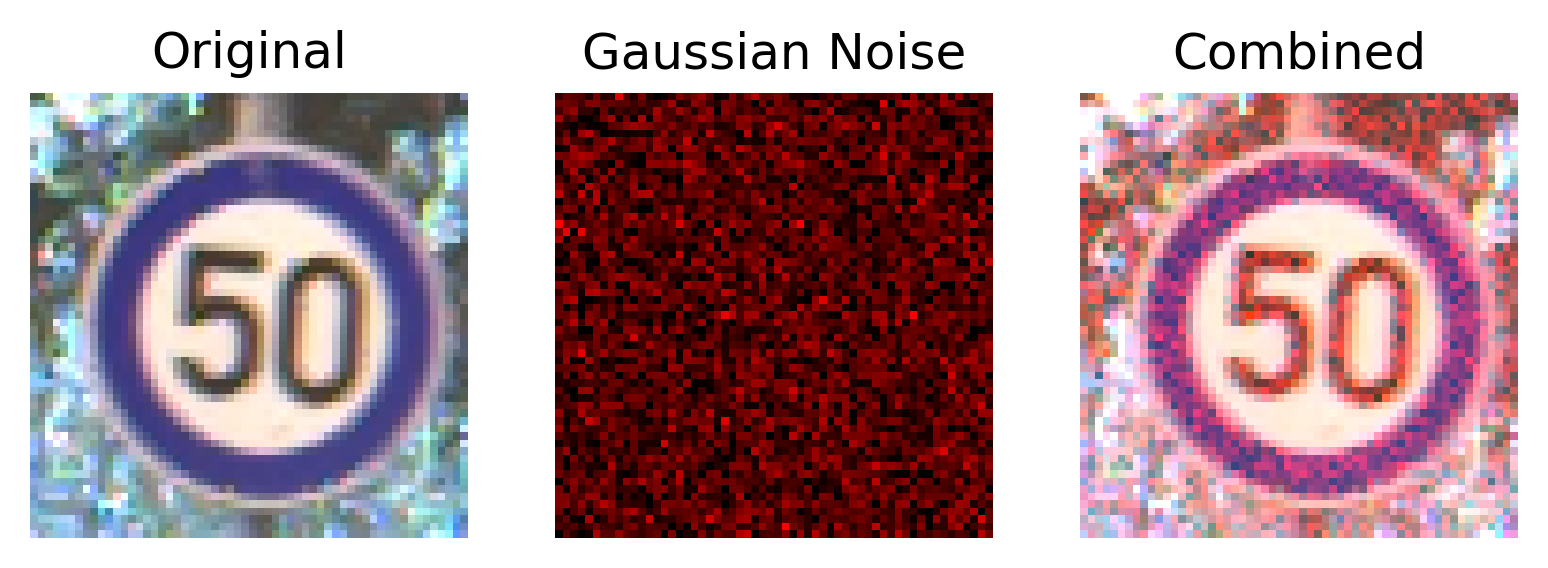

(34, 33, 3)


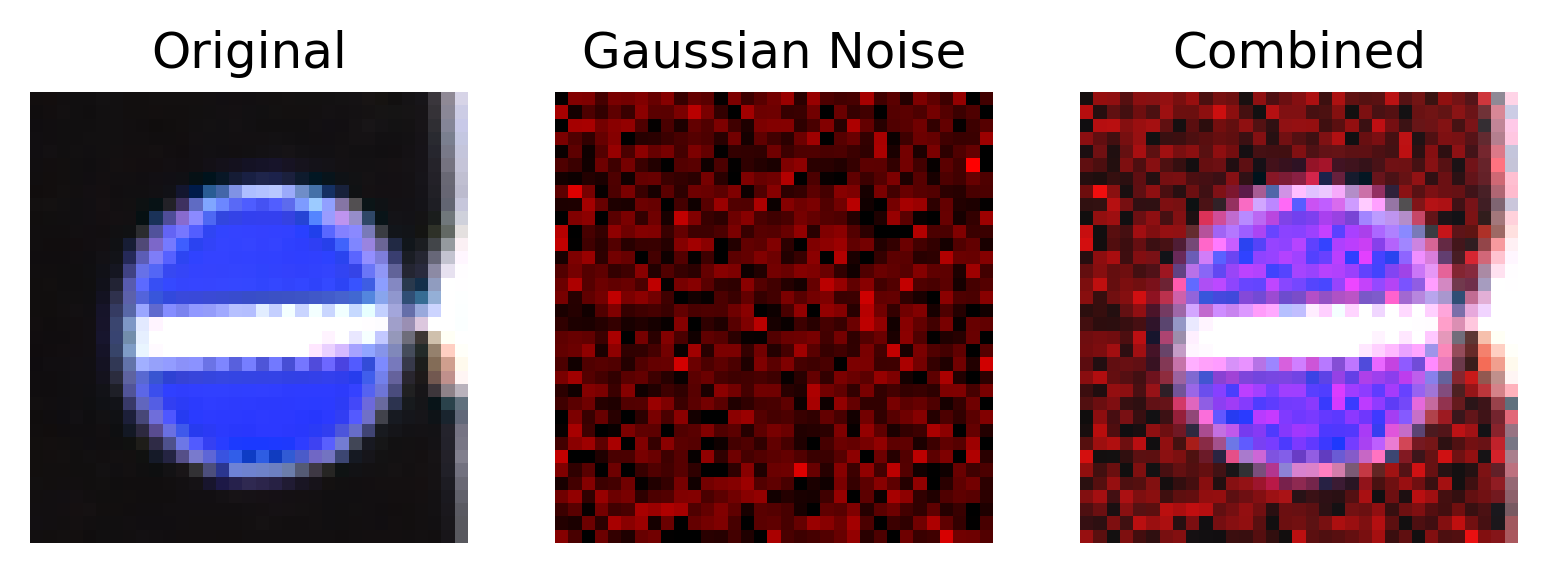

(36, 34, 3)


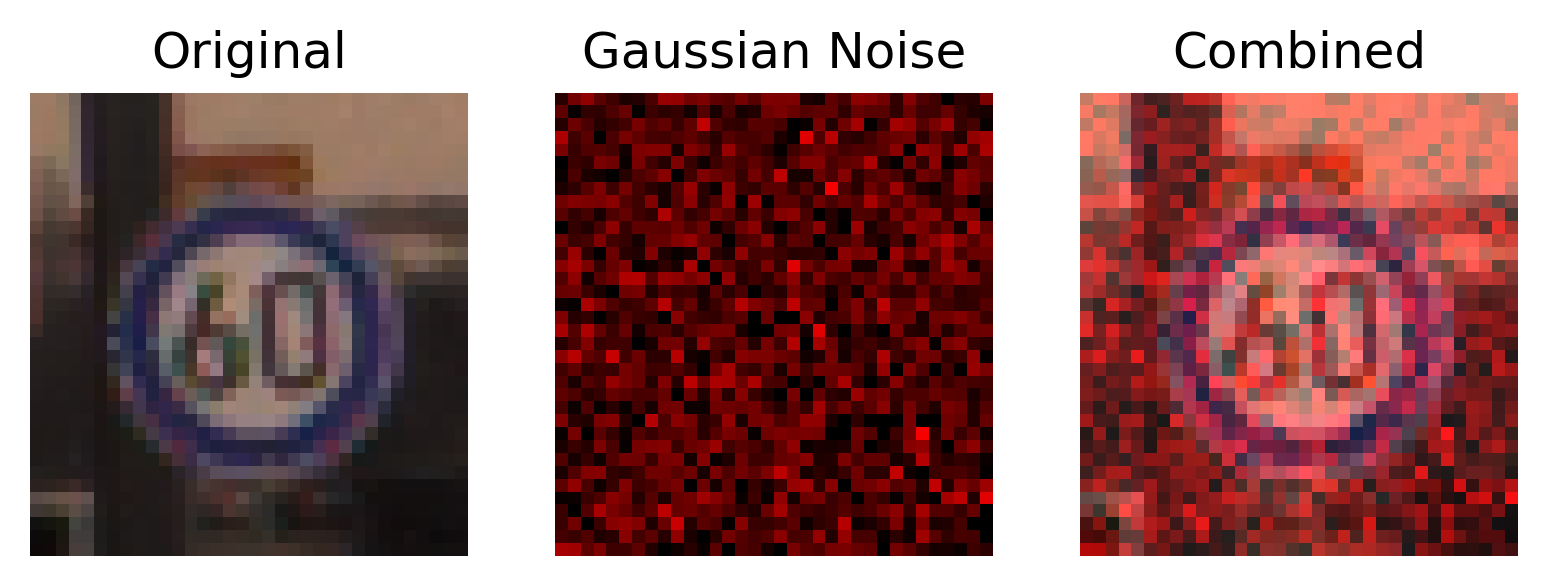

(74, 80, 3)


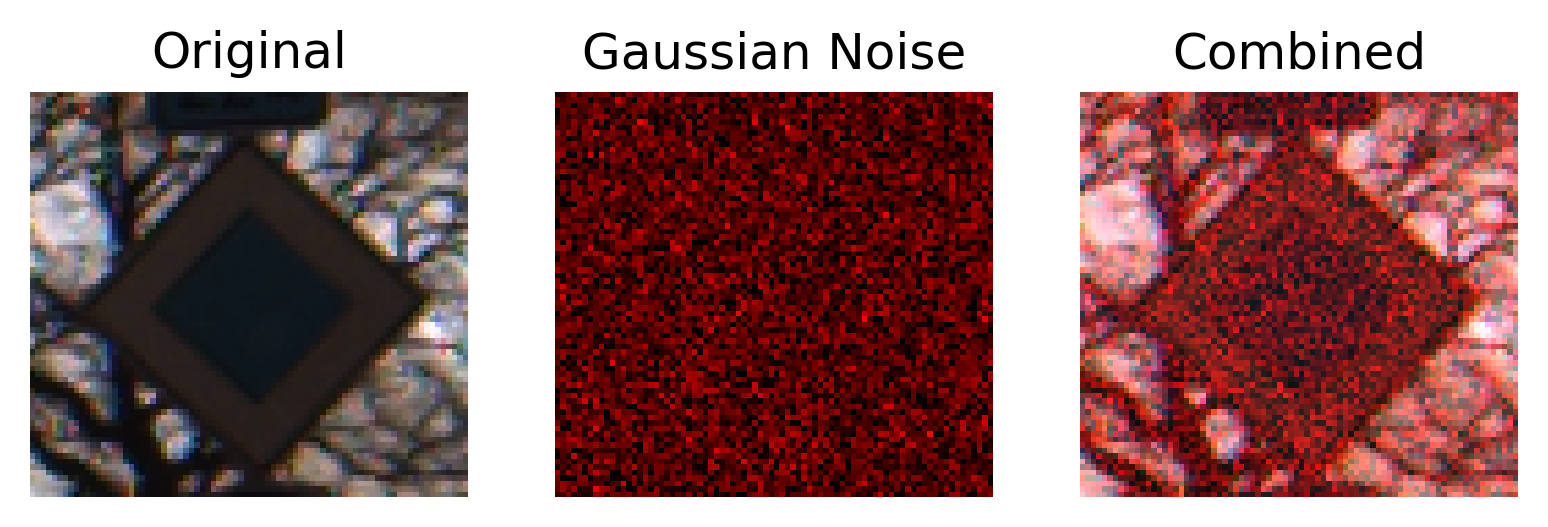

(31, 30, 3)


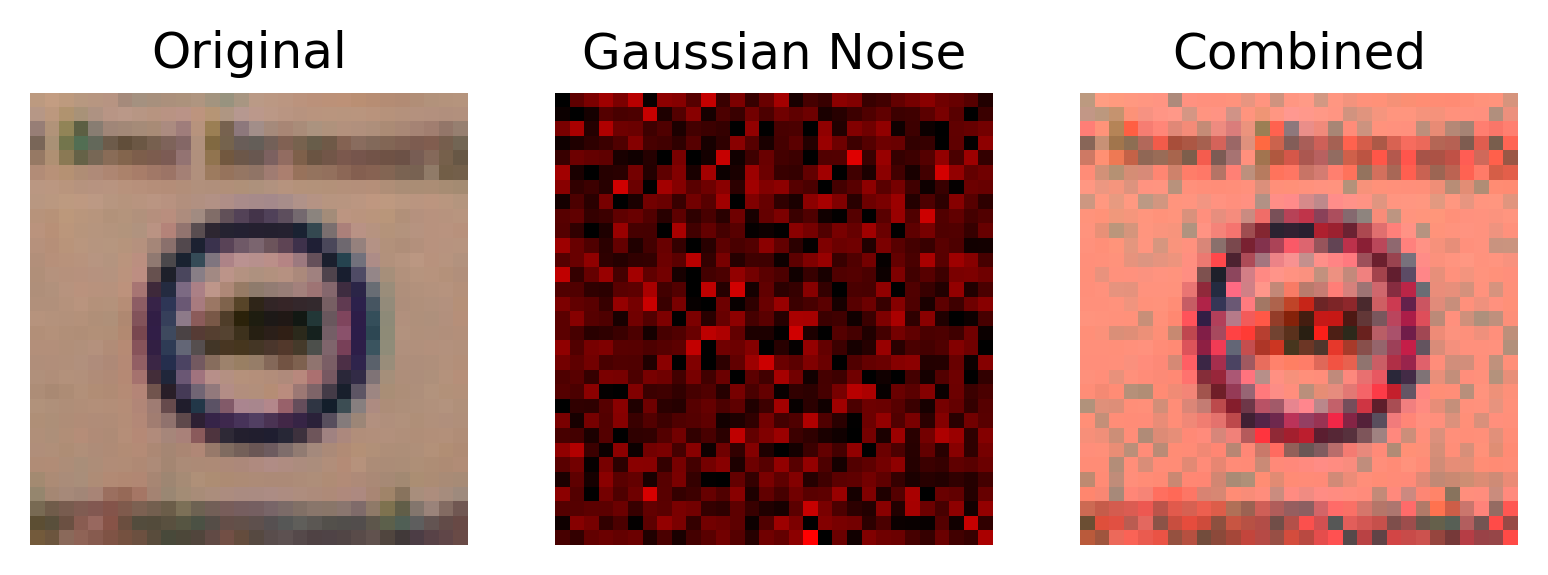

(43, 43, 3)


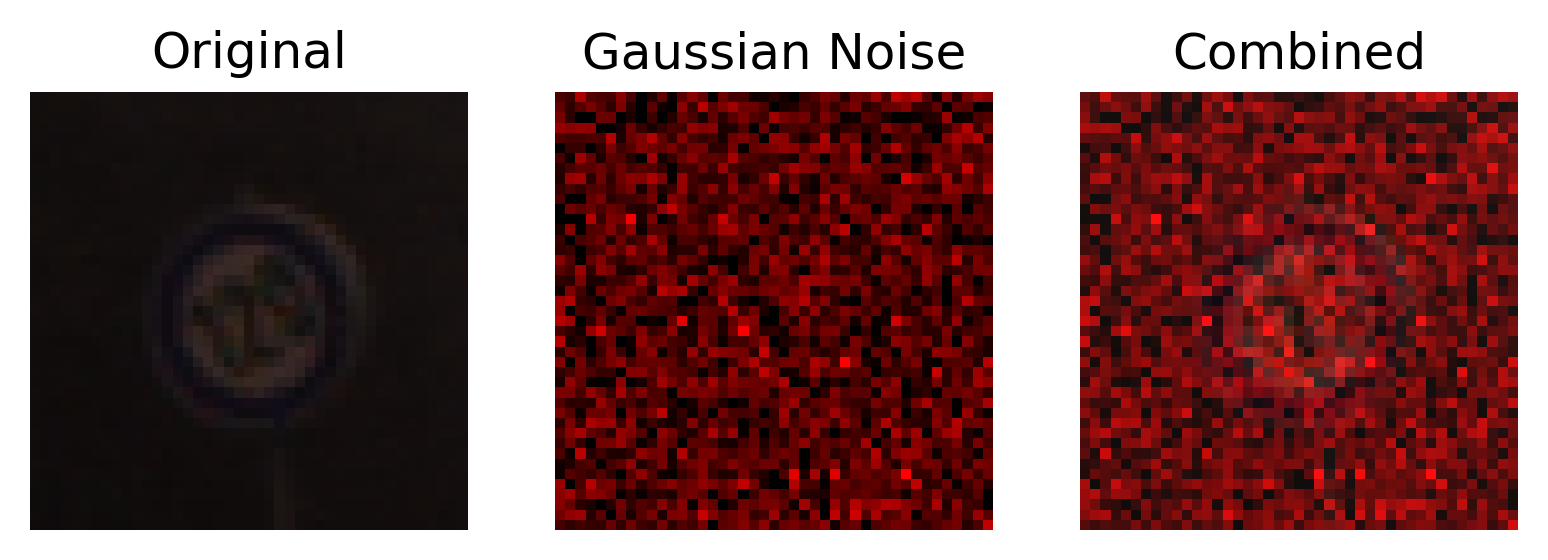

(70, 71, 3)


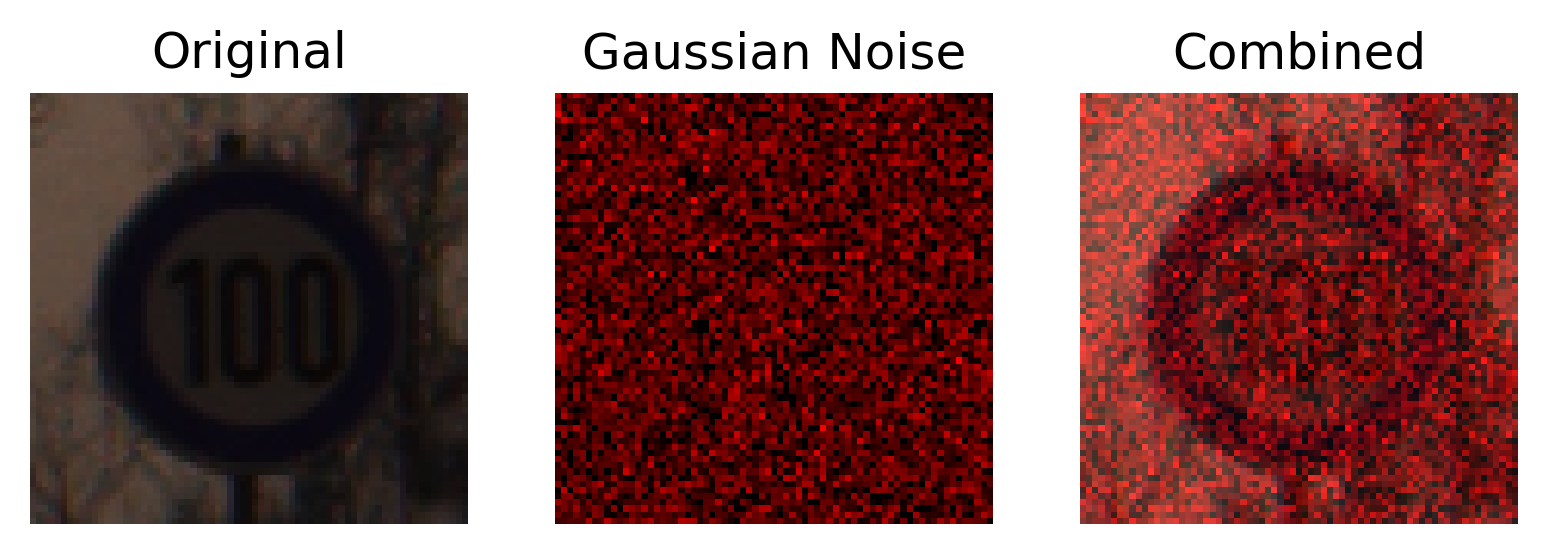

(35, 37, 3)


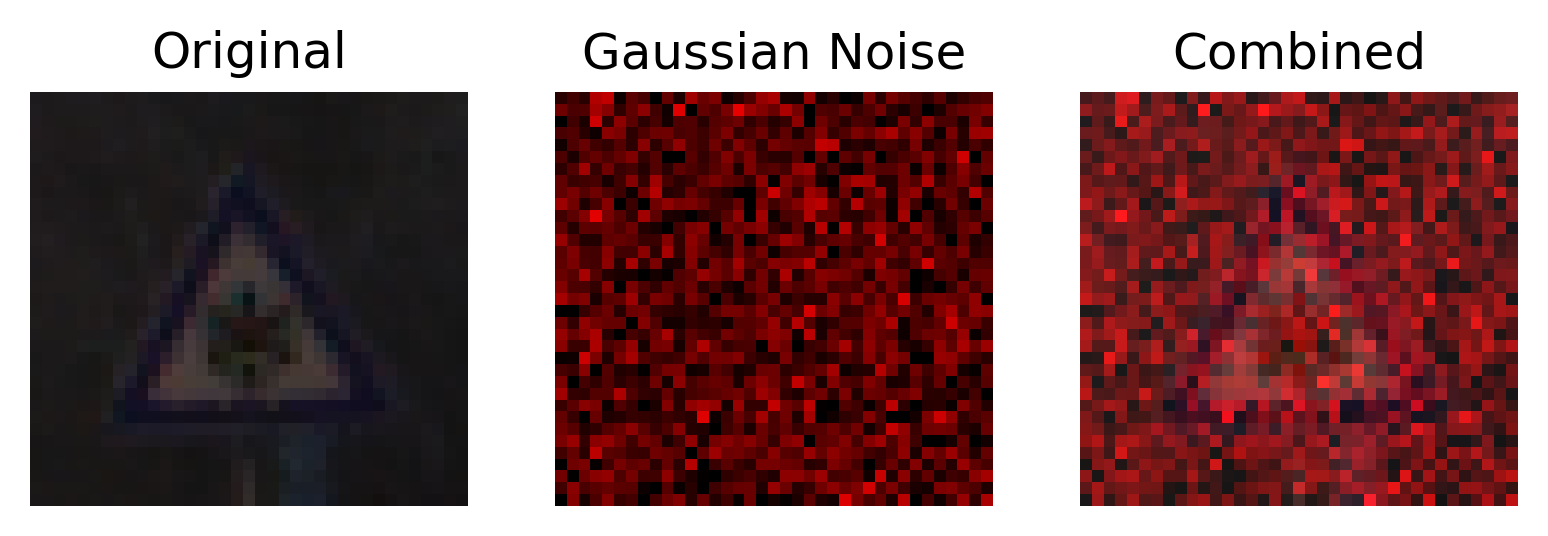

(91, 105, 3)


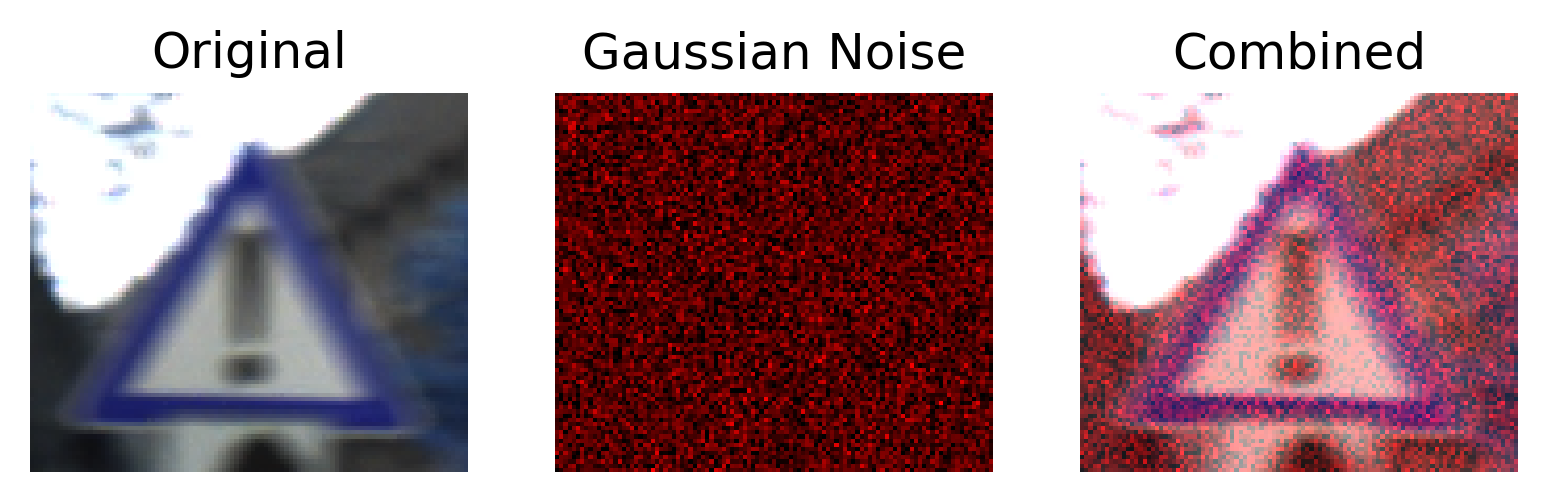

(40, 41, 3)


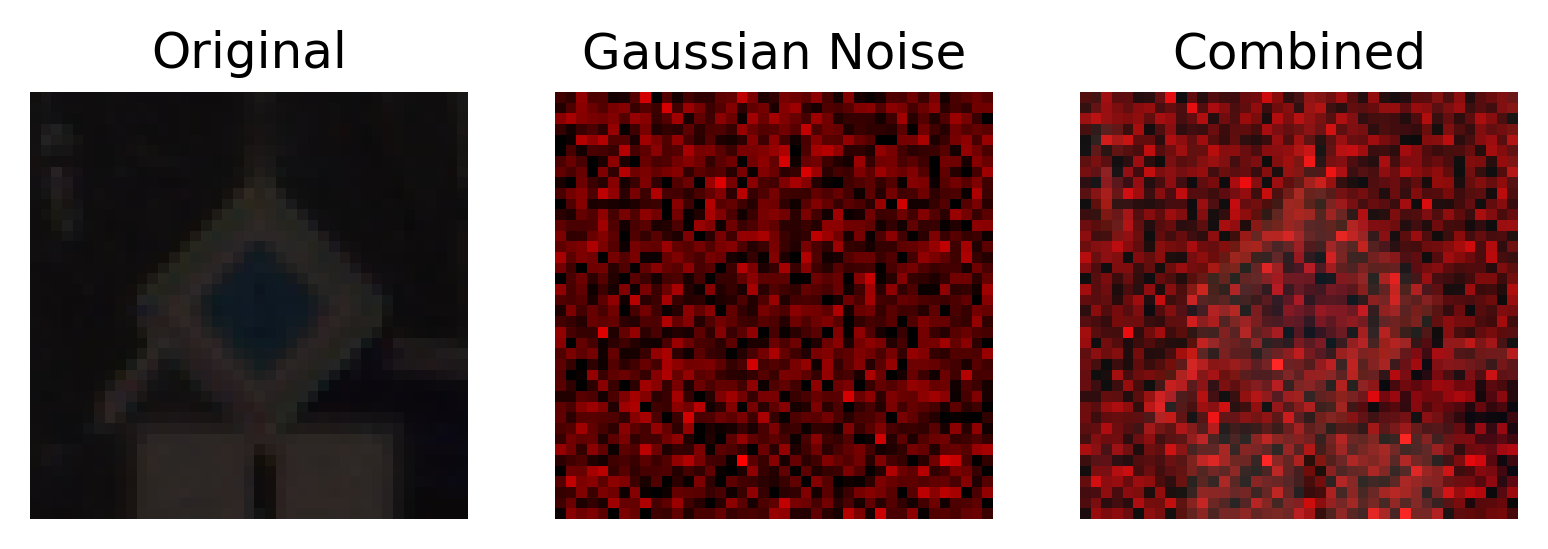

(66, 75, 3)


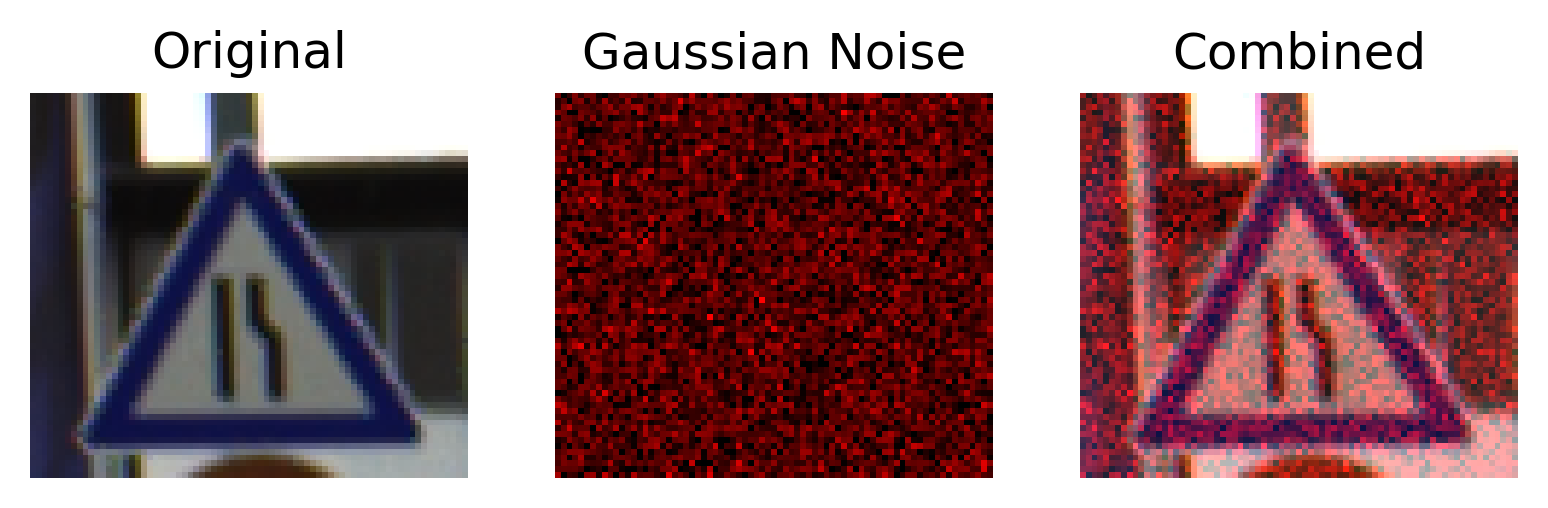

(49, 46, 3)


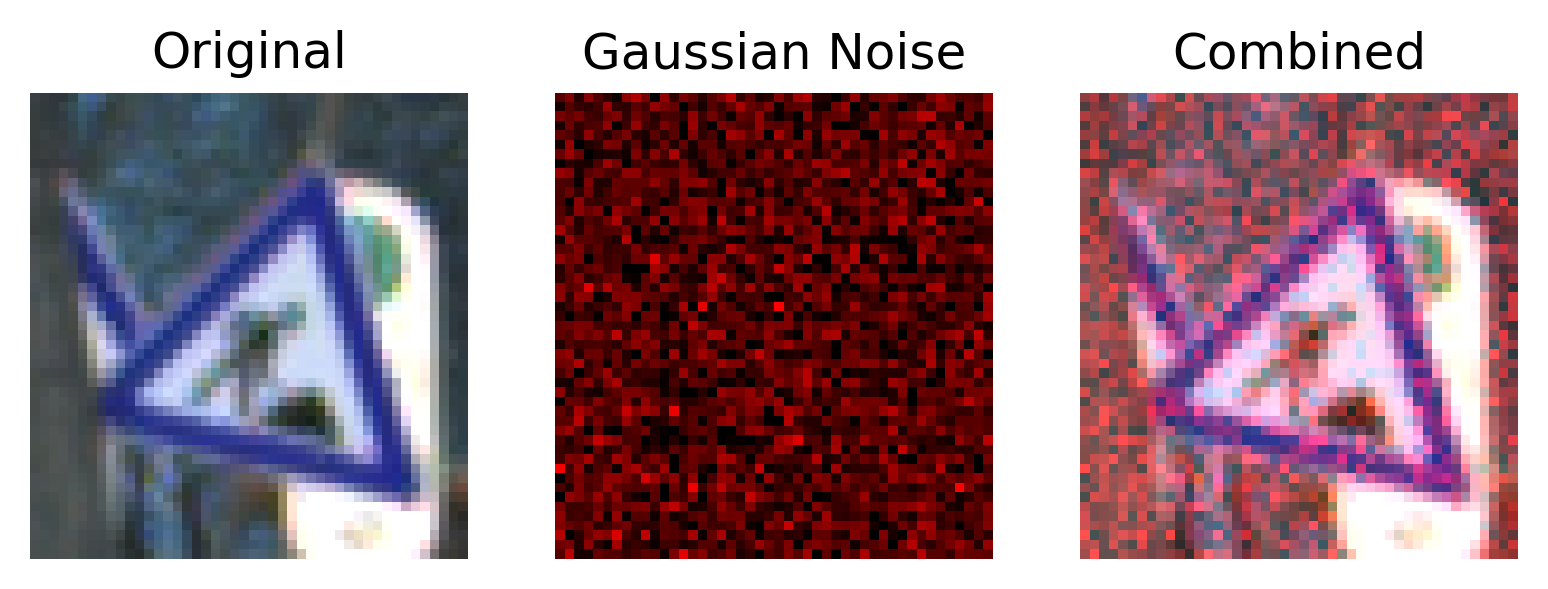

(33, 33, 3)


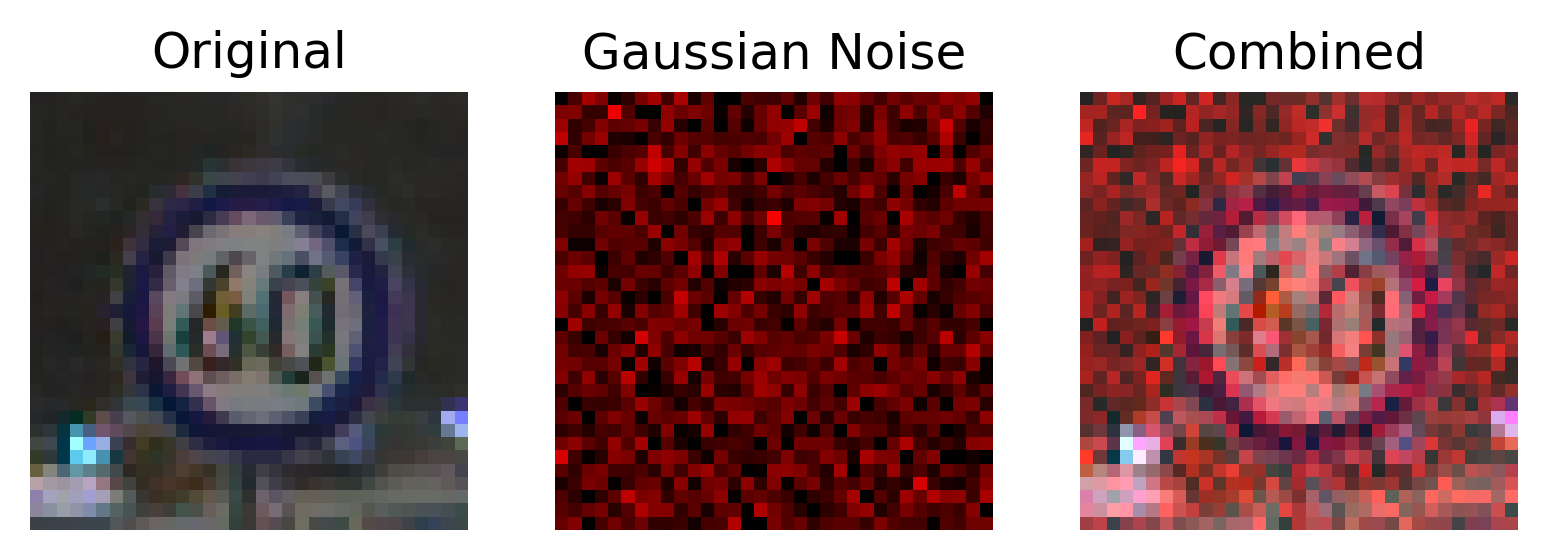

(31, 31, 3)


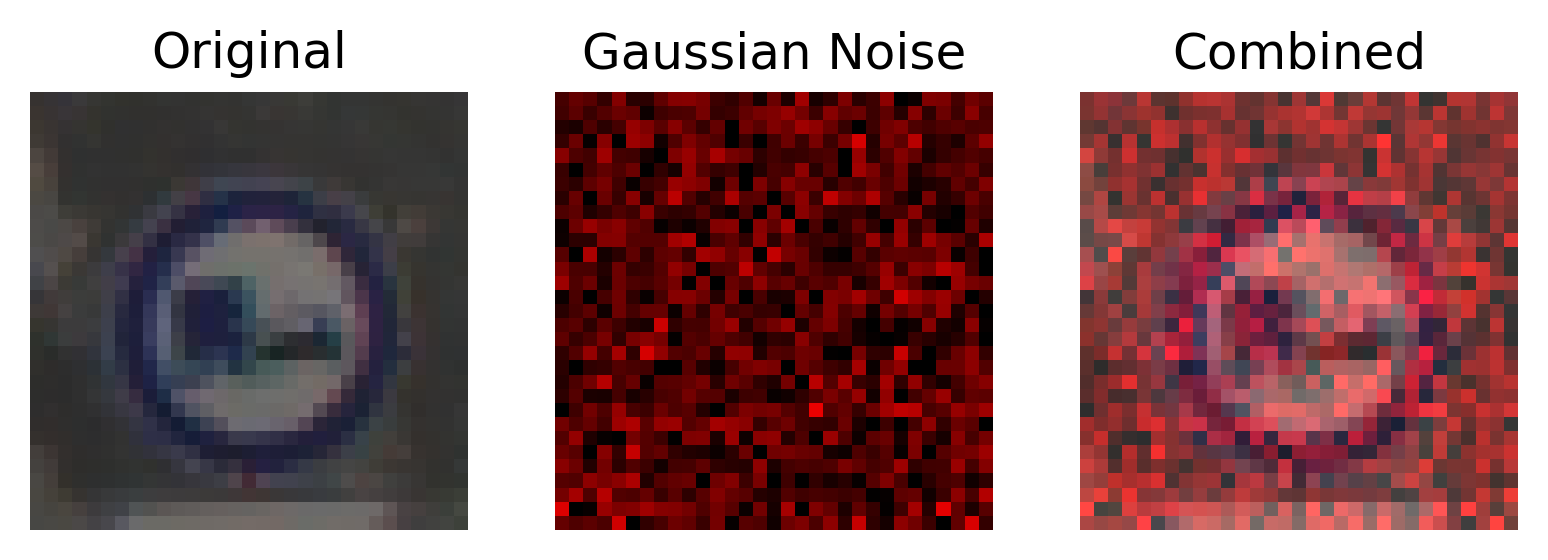

(34, 34, 3)


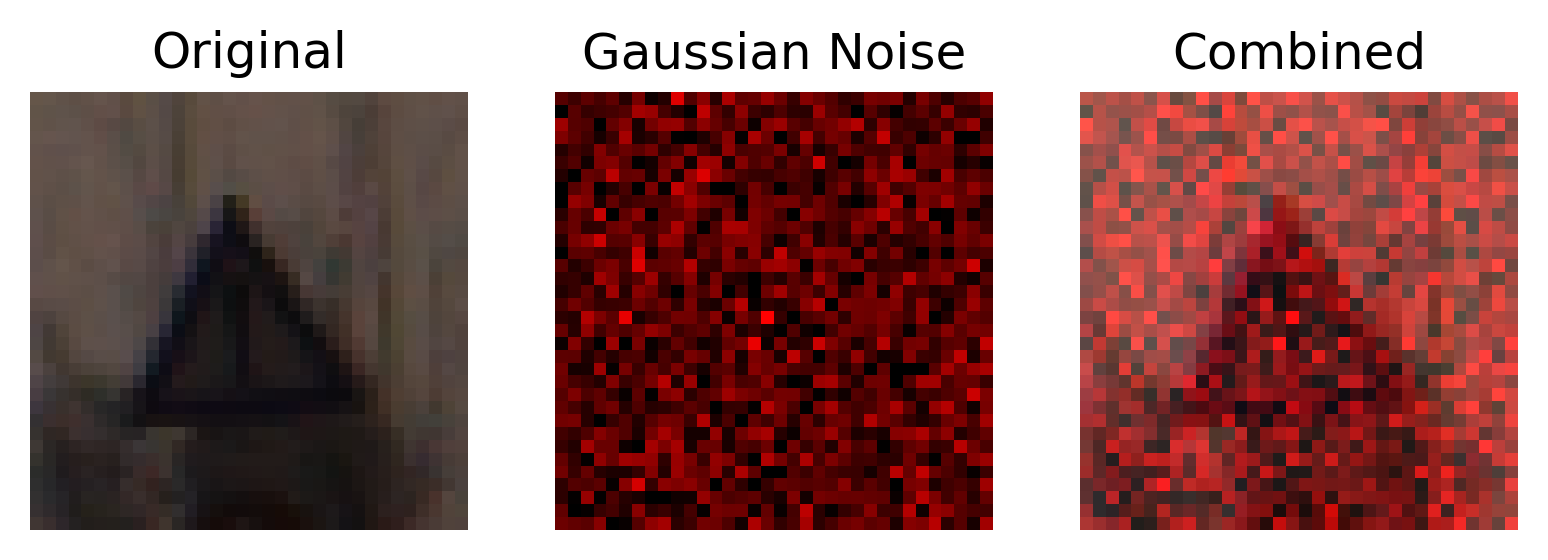

(40, 41, 3)


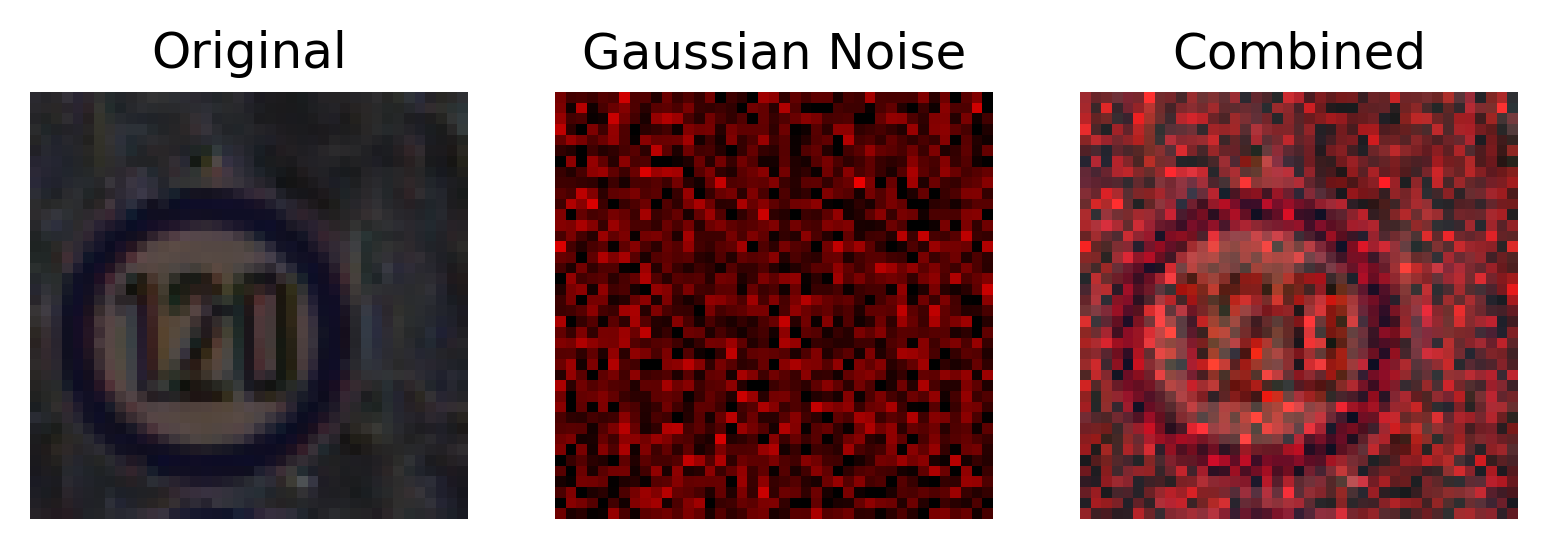

(27, 27, 3)


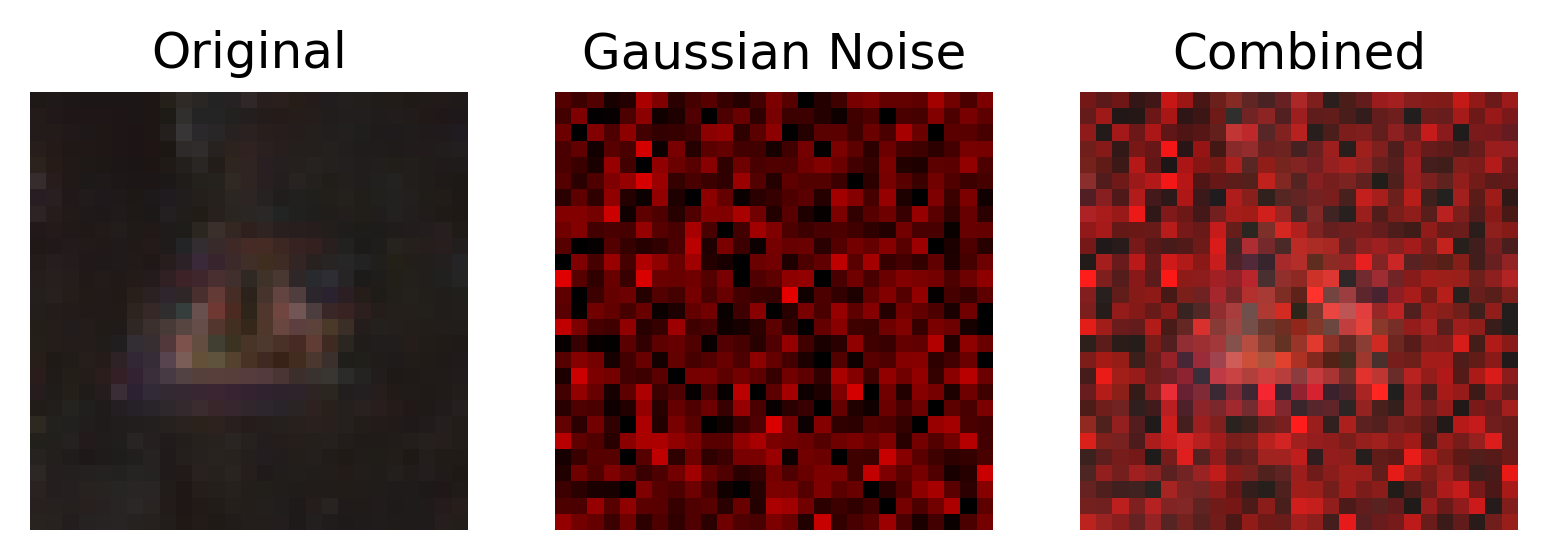

(143, 155, 3)


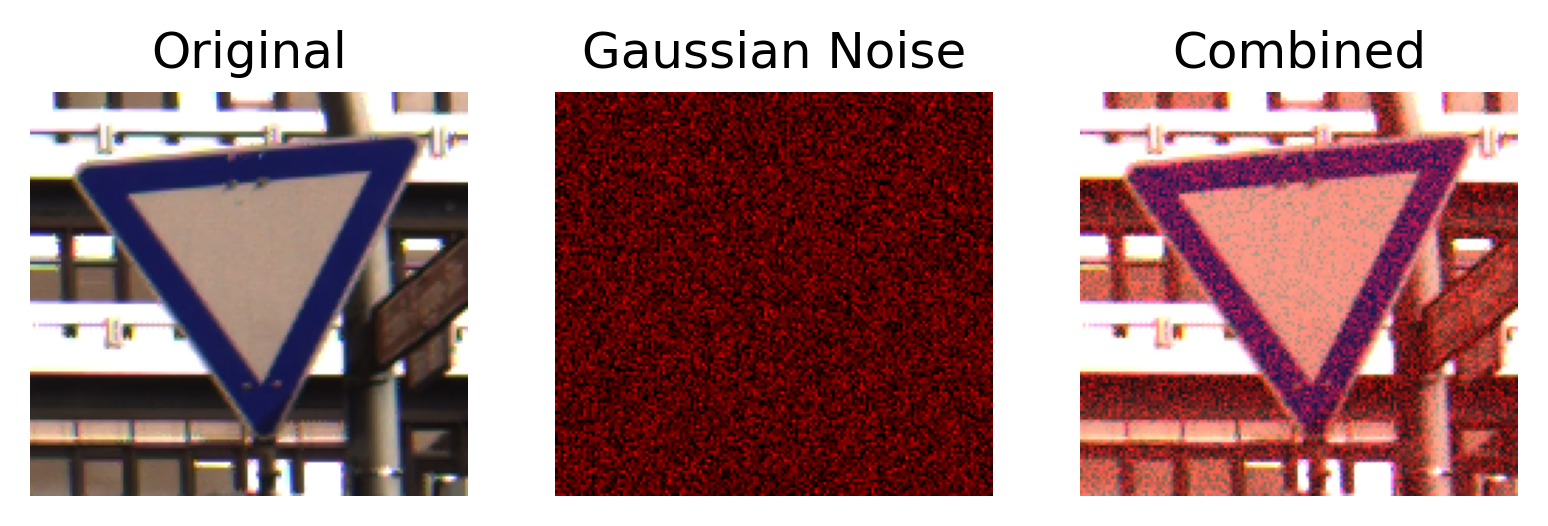

(87, 97, 3)


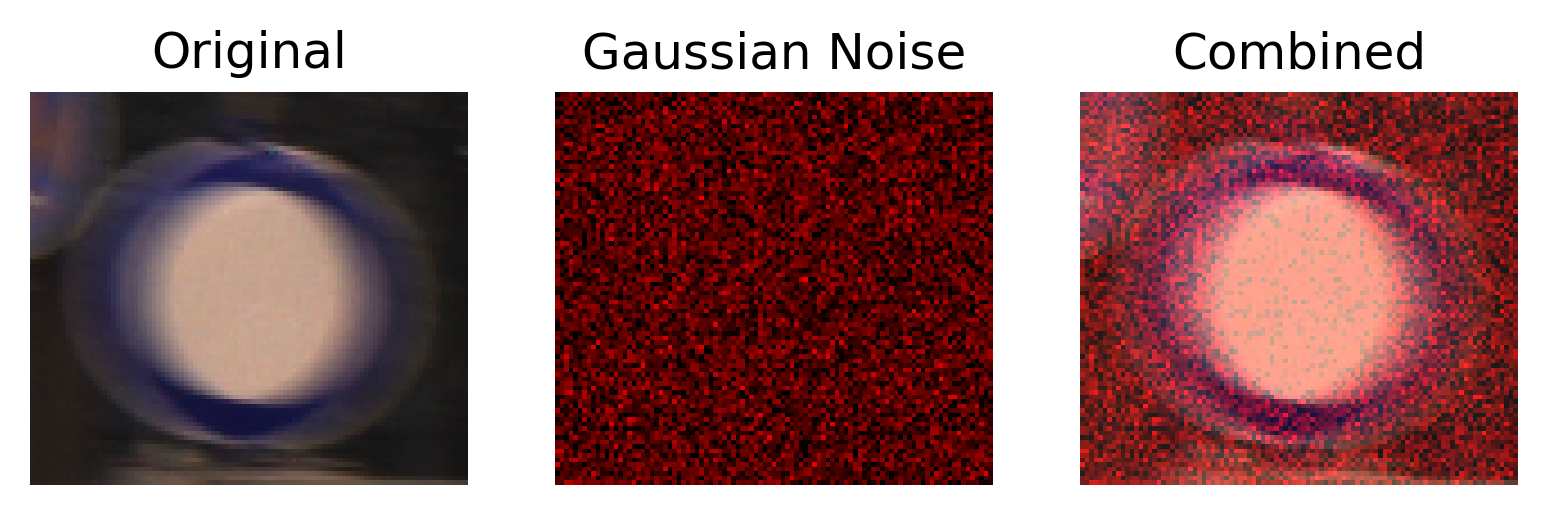

(47, 46, 3)


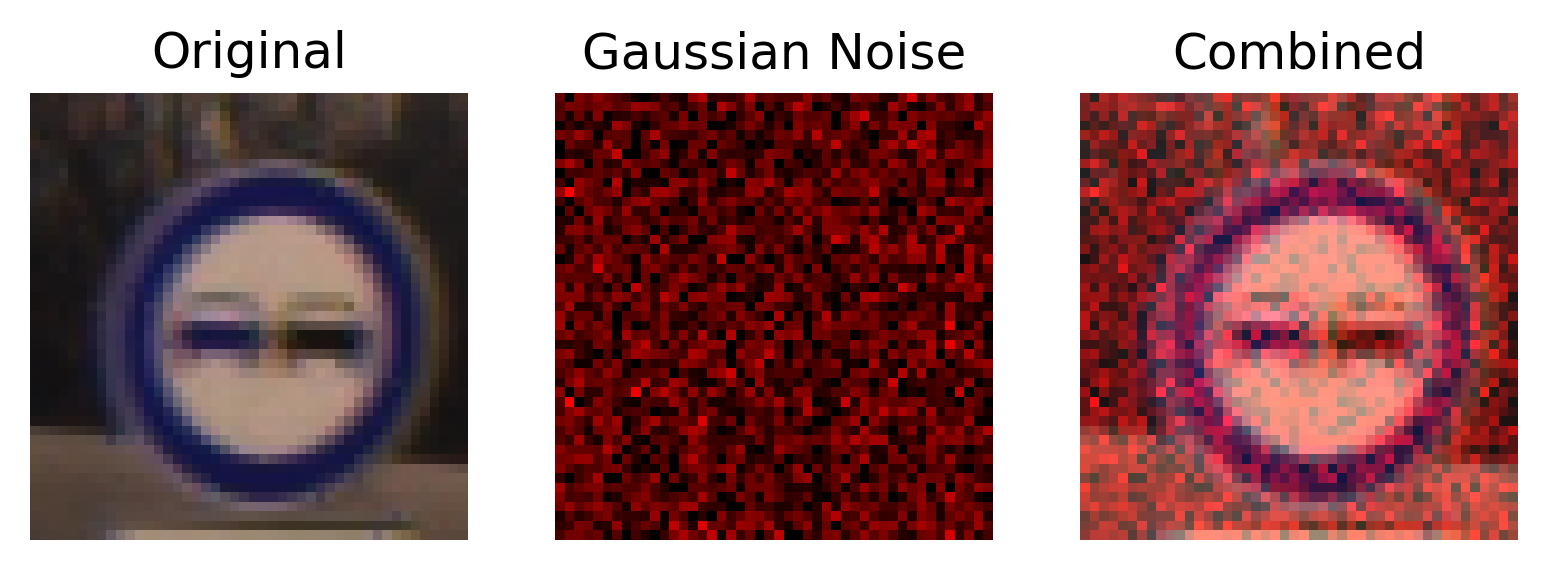

(87, 95, 3)


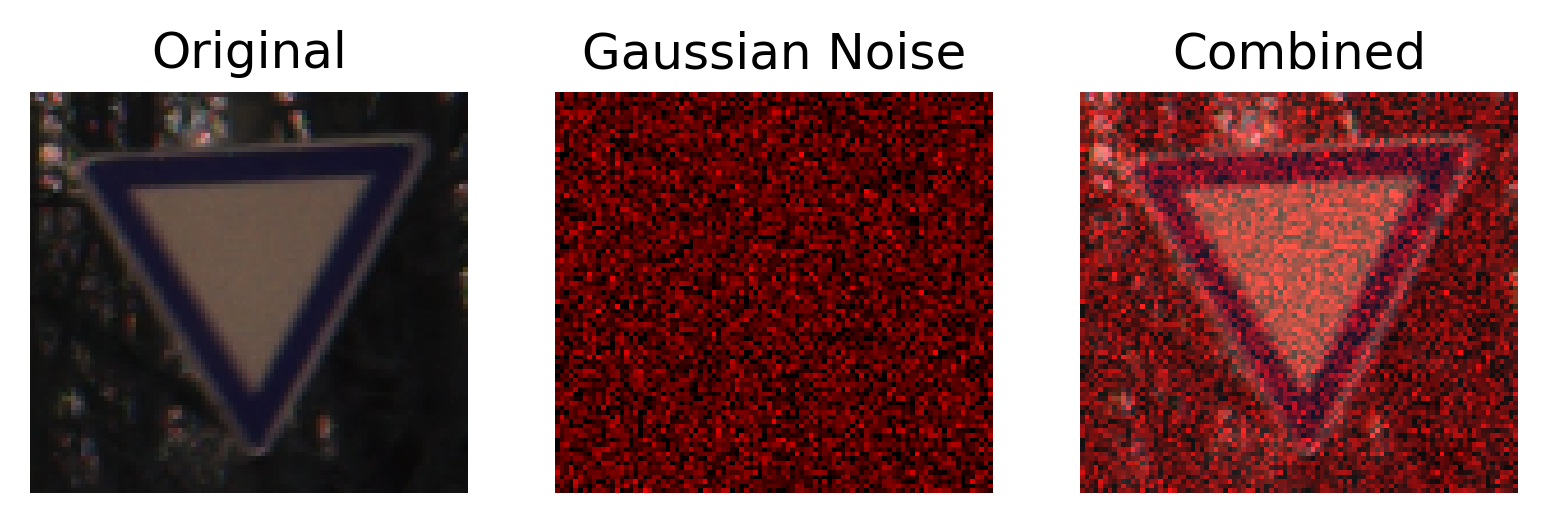

(34, 34, 3)


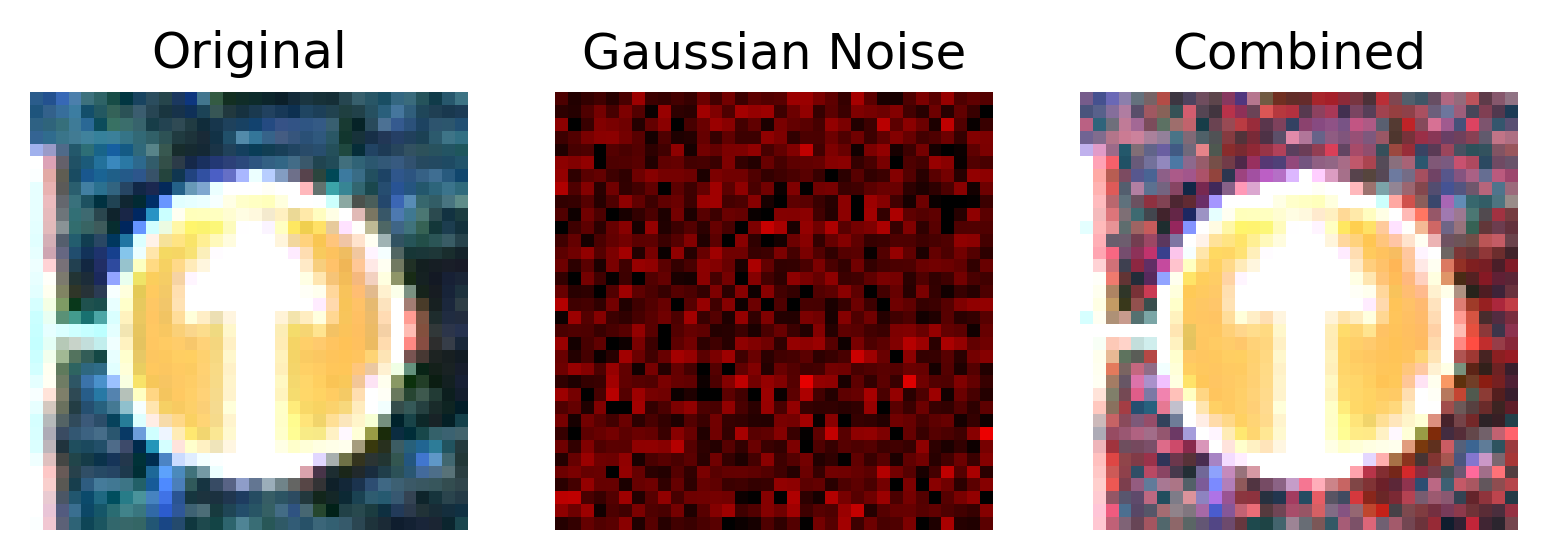

(34, 37, 3)


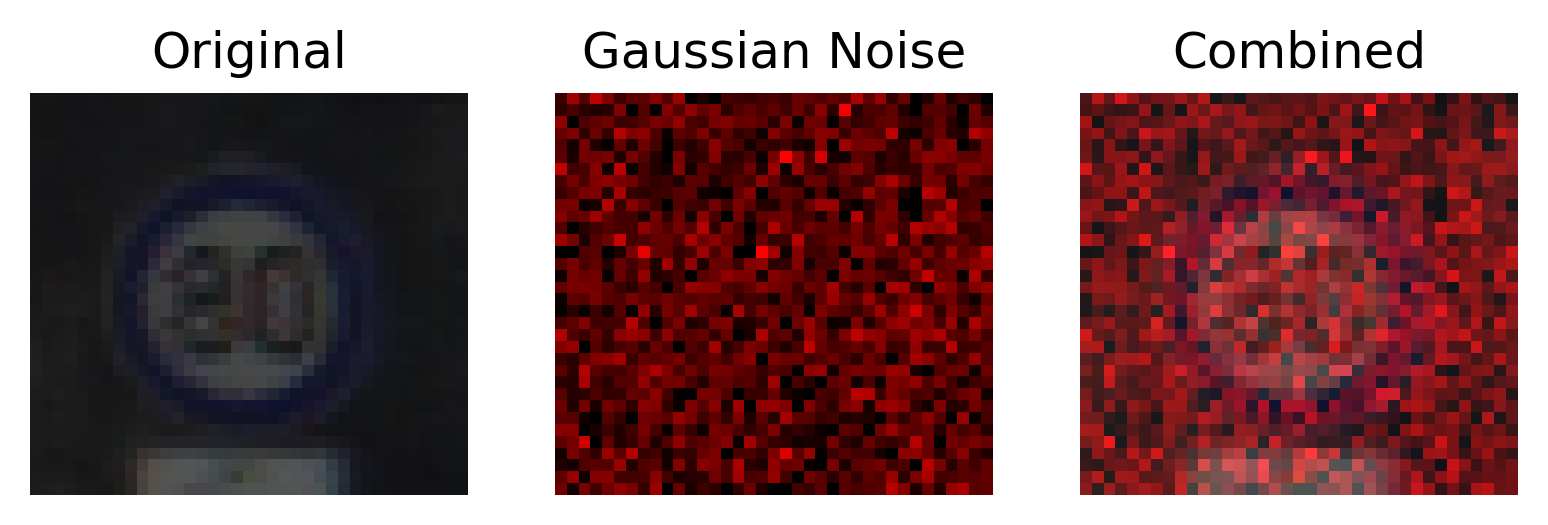

(54, 58, 3)


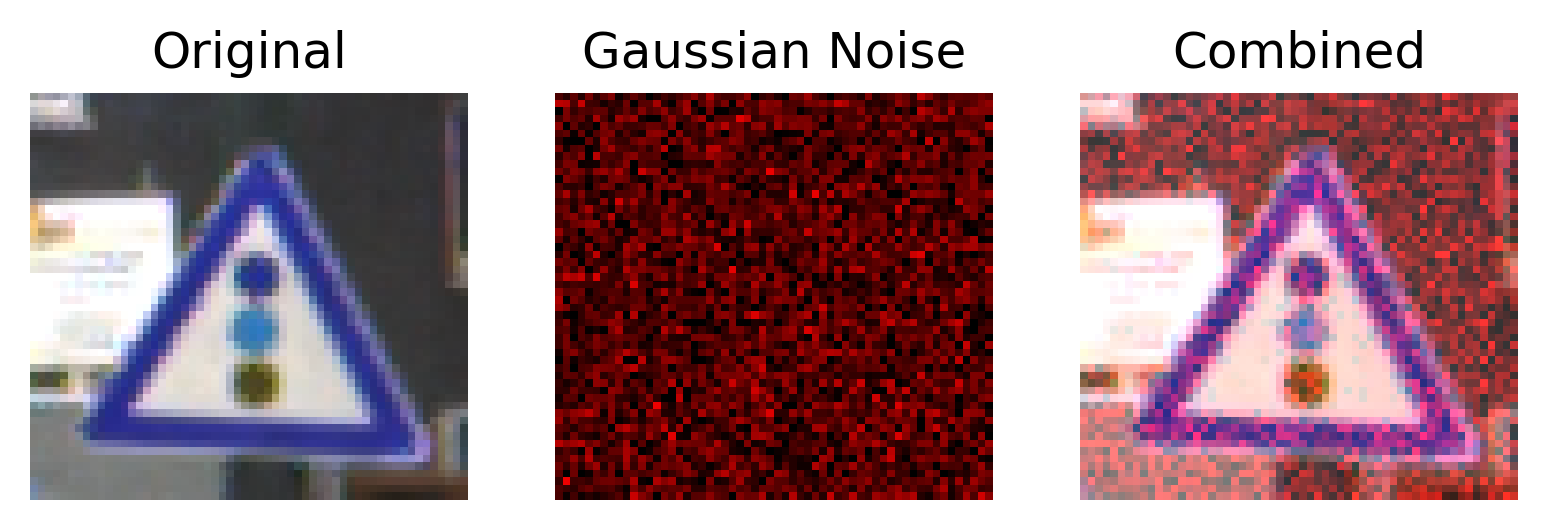

(35, 33, 3)


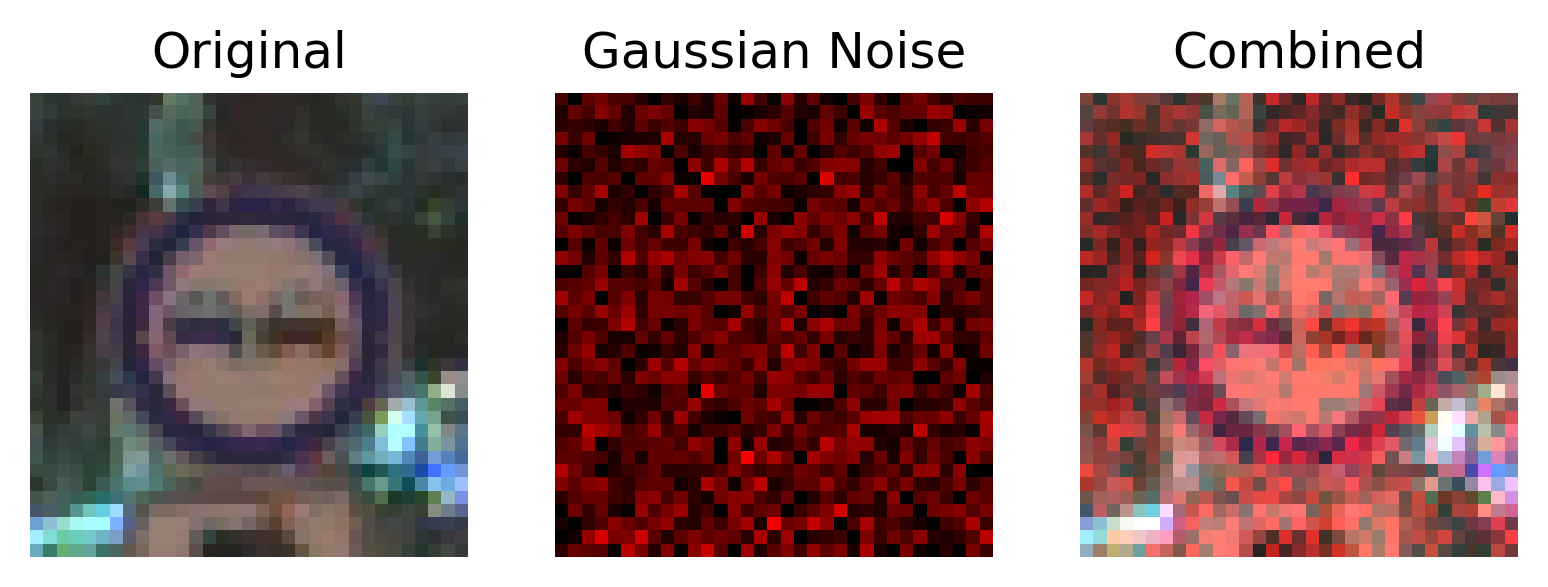

(37, 36, 3)


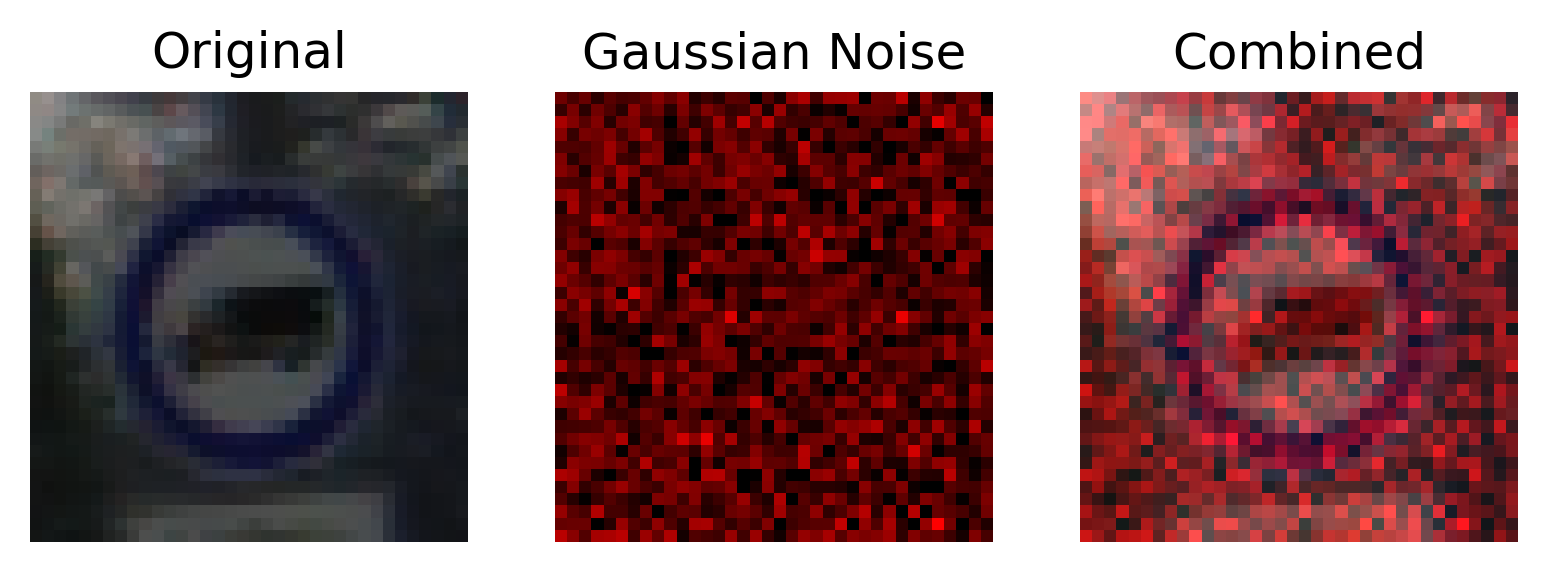

(93, 93, 3)


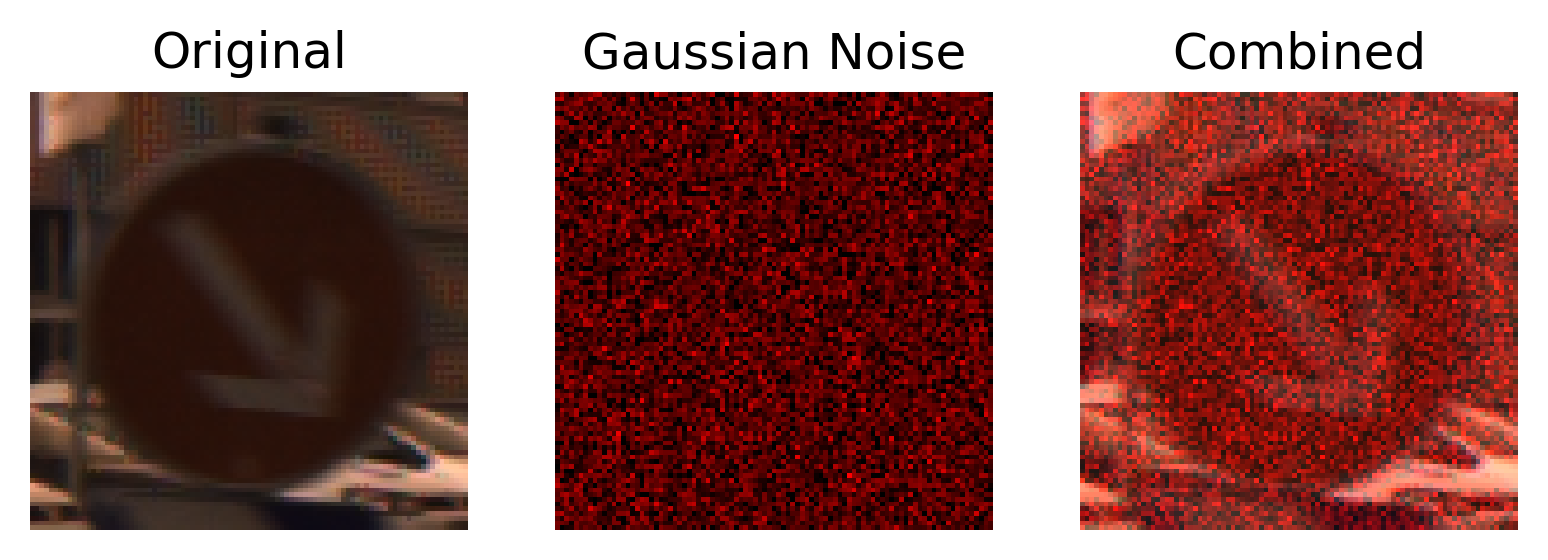

(40, 40, 3)


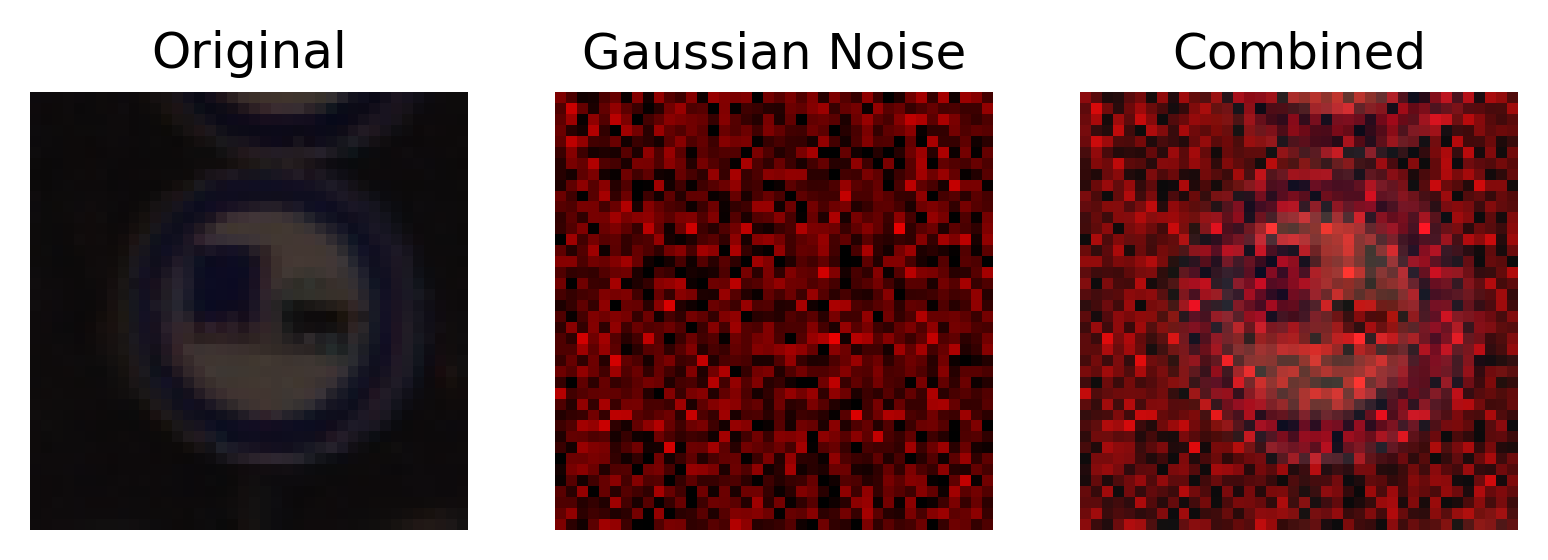

(54, 53, 3)


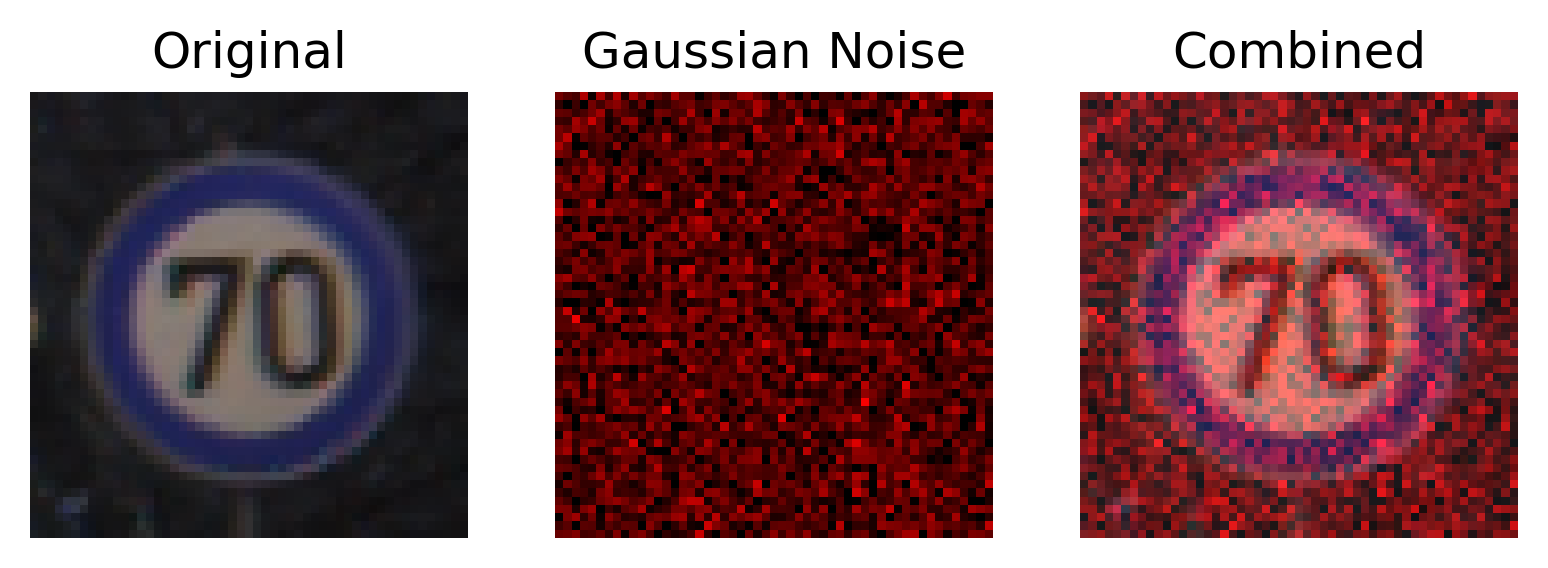

(37, 36, 3)


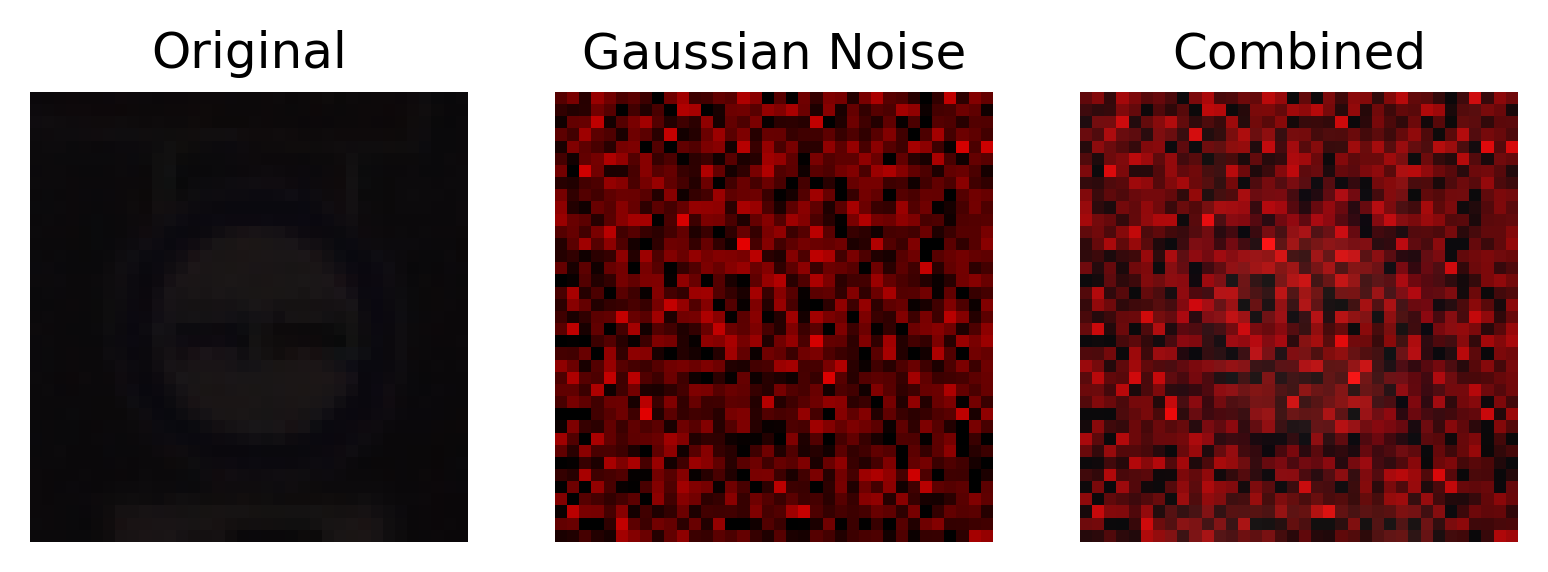

(42, 42, 3)


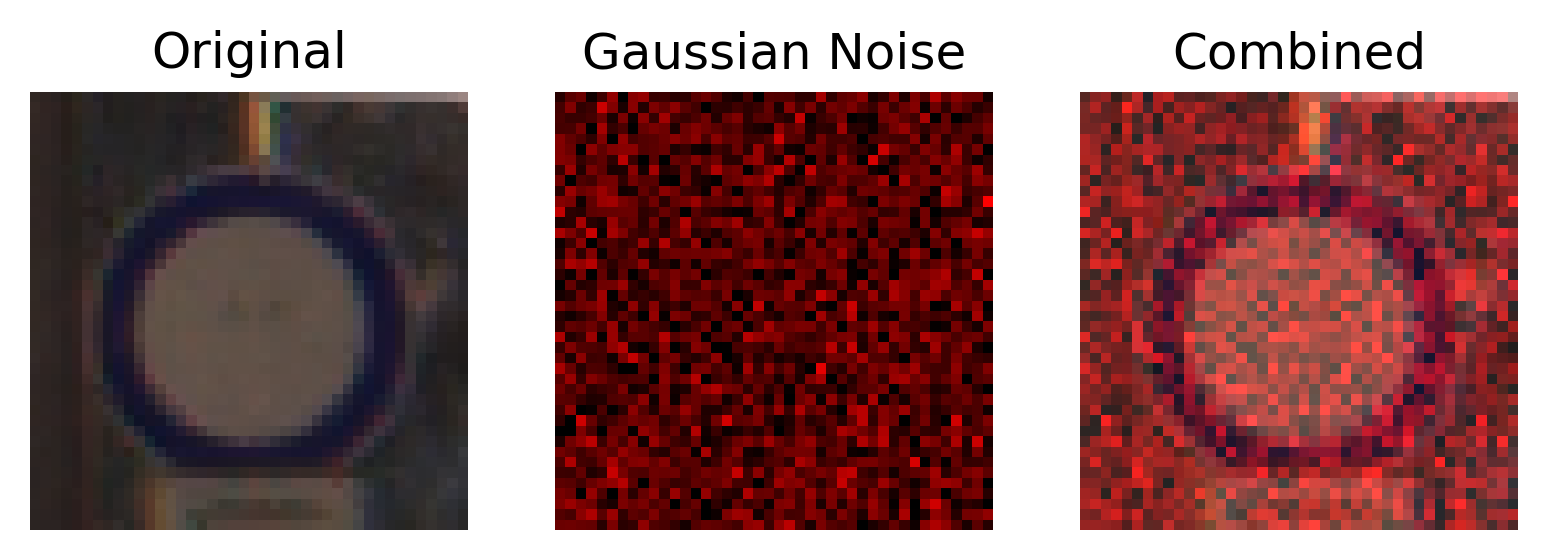

(51, 52, 3)


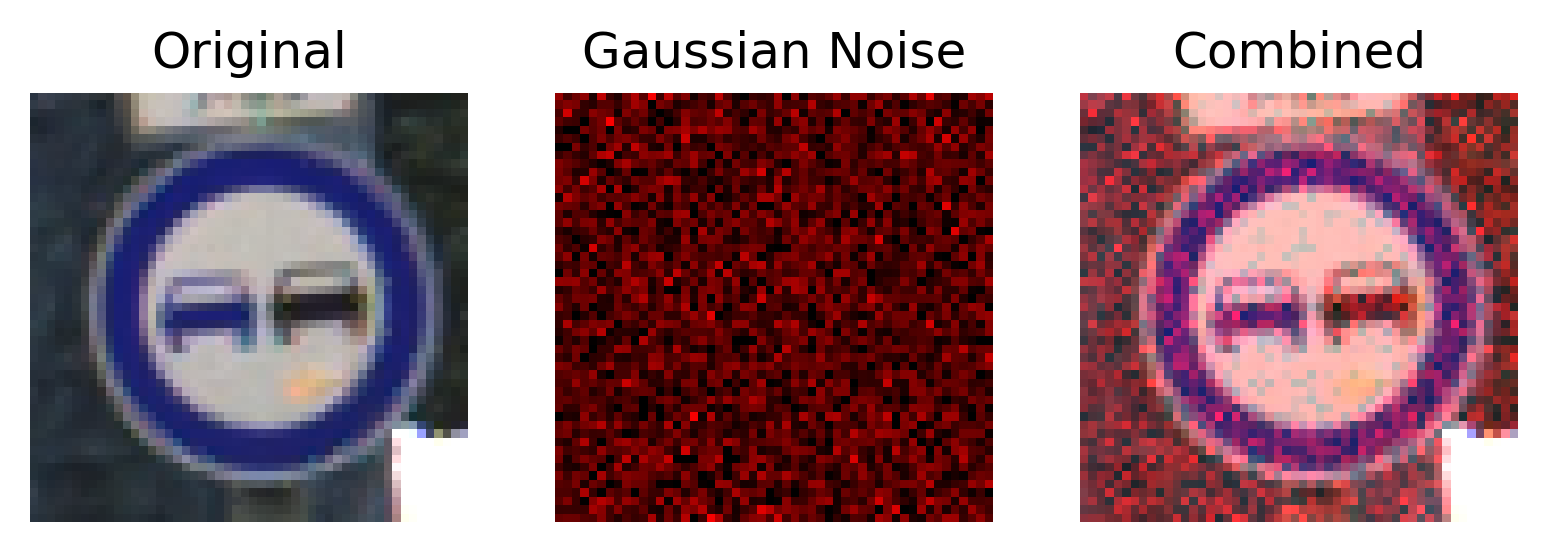

(27, 28, 3)


KeyboardInterrupt: 

In [68]:
import os
from os import listdir
from os.path import isfile, join

rootdir = os.getcwd() + r"/Test"

#folder_name = "Test"

def get_files(path):
    onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
    return onlyfiles

def get_search_files(start_path):
    for subdir, dirs, files in start_path:
        for file in files:
            if file[-4:]==".png":
                img=cv2.imread(os.getcwd() + r"/Test/"+ file)
               # print(img.shape)
                #image = img.resize((30,30))
                gauss_noise=np.zeros((img.shape),dtype=np.uint8)
                cv2.randn(gauss_noise,120,20)
                #cv2.randn(gauss_noise,100,10)
                #cv2.randn(gauss_noise,80,50)
                #gauss_noise=(gauss_noise*0.5).astype(np.uint8)
                gn_img=cv2.add(img,gauss_noise)
                print(gn_img.shape)
                fig=plt.figure(dpi=300)



                fig.add_subplot(1,3,1)
                plt.imshow(img,cmap='gray')
                plt.axis("off")
                plt.title("Original")

                fig.add_subplot(1,3,2)
                plt.imshow(gauss_noise,cmap='gray')
                plt.axis("off")
                plt.title("Gaussian Noise")

                fig.add_subplot(1,3,3)
                plt.imshow(gn_img,cmap='gray')
                #save gn_img to test_with_noise-folder
                plt.imsave("Test_W_noise\\" + file, gn_img)
                plt.axis("off")
                plt.title("Combined")
                plt.show()
        
#         #for x in dirs:
#            if x == folder_name:
#                 data_folder_path = os.path.join(subdir, x)
#                 dirlist = get_files(data_folder_path)
#                 return dirlist

dirlist = get_search_files(os.walk(rootdir))

In [70]:
X_test_noise, label = testing('TestWnoise.csv')
print(len(label))
print(X_test_noise.shape)
print(label.shape)

12630
(12630, 30, 30, 4)
(12630,)


In [67]:
print(X_test[0])

[[[116 140 175]
  [116 138 171]
  [119 138 173]
  ...
  [102 119 150]
  [101 122 149]
  [ 93 112 139]]

 [[116 142 177]
  [116 141 175]
  [117 141 174]
  ...
  [120 143 178]
  [122 144 176]
  [122 142 174]]

 [[118 142 174]
  [116 141 175]
  [114 140 172]
  ...
  [121 144 181]
  [122 144 180]
  [119 142 178]]

 ...

 [[117 137 168]
  [115 135 165]
  [116 135 164]
  ...
  [116 138 170]
  [116 136 168]
  [118 139 171]]

 [[116 136 166]
  [115 134 167]
  [115 133 165]
  ...
  [114 135 168]
  [116 136 166]
  [115 139 167]]

 [[112 135 166]
  [111 134 165]
  [119 135 166]
  ...
  [115 137 166]
  [117 138 167]
  [114 140 170]]]


In [44]:
print((X_test_noise[0]))

[[[235 140 116 255]
  [204 138 116 255]
  [233 138 119 255]
  ...
  [243 119 102 255]
  [253 122 101 255]
  [215 112  93 255]]

 [[195 142 116 255]
  [217 141 116 255]
  [241 141 117 255]
  ...
  [246 143 120 255]
  [249 144 122 255]
  [242 142 122 255]]

 [[233 142 118 255]
  [229 141 116 255]
  [240 140 114 255]
  ...
  [234 144 121 255]
  [233 144 122 255]
  [248 142 119 255]]

 ...

 [[242 137 117 255]
  [250 135 115 255]
  [230 135 116 255]
  ...
  [228 138 116 255]
  [221 136 116 255]
  [246 139 118 255]]

 [[225 136 116 255]
  [248 134 115 255]
  [216 133 115 255]
  ...
  [241 135 114 255]
  [220 136 116 255]
  [255 139 115 255]]

 [[250 135 112 255]
  [252 134 111 255]
  [240 135 119 255]
  ...
  [228 137 115 255]
  [237 138 117 255]
  [231 140 114 255]]]


In [36]:
Y_pred_noise = model.predict(X_test_noise)
classes_x=np.argmax(Y_pred_noise,axis=1)
Y_pred_noise
print(classes_x)
#print(len(Y_pred))

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/conv2d/Relu' defined at (most recent call last):
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\mukhg\AppData\Local\Temp\ipykernel_18340\2940548102.py", line 1, in <module>
      Y_pred_noise = model.predict(X_test_noise)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
      return self(x, training=False)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\layers\convolutional\base_conv.py", line 278, in call
      return self.activation(outputs)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\activations.py", line 311, in relu
      return backend.relu(x, alpha=alpha, max_value=max_value, threshold=threshold)
    File "C:\Users\mukhg\anaconda3\envs\tensorflow\lib\site-packages\keras\backend.py", line 4992, in relu
      x = tf.nn.relu(x)
Node: 'sequential/conv2d/Relu'
input depth must be evenly divisible by filter depth: 4 vs 3
	 [[{{node sequential/conv2d/Relu}}]] [Op:__inference_predict_function_10261]

In [ ]:
print(accuracy_score(label, classes_x))

In [ ]:
#img=cv2.imread(r'C:\Users\mukhg\Downloads\Test\0)
#print(img.shape)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, rootdir))

In [ ]:
img = cv2.imread("12564.png")
noise = np.zeros((30,16), np.uint8)

# Generate Gaussian noise
cv2.randn(noise, 0, 50)

# Add the noise to the image
noisy_img = cv2.add(img, noise)

cv2.imshow("Original Image", img)
cv2.imshow("Noisy Image", noisy_img)
cv2.waitKey(0)

In [ ]:
print(y_test)
print(type(y_test))
print(y_test[0])

In [ ]:
model.save("./training/TSR.h5")

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

In [ ]:
print(label)
enc = OneHotEncoder()
enc.fit(label.reshape(-1,1))
onehotlabels = enc.transform(label.reshape(-1,1)).toarray()
print(onehotlabels)
for label in onehotlabels:
    print(label)

In [ ]:
Y_pred = model.predict(X_test)
predictions = np.argmax(model.predict(x_test), axis=-1)
predicted = np.argmax(model.predict(token_list),axis=1)
#Y_pred = (model.predict_classes(X_test) > 0.5).astype("int32")np.argmax(model.predict(x), axis=-1)

In [ ]:
Y_pred = model.predict(X_test)
print(Y_pred)
Y_pred = np.array(enc.fit(Y_pred))
print(type(Y_pred))
for pred in Y_pred:
    print(pred)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label,np.array(Y_pred)))

In [ ]:
1

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

In [ ]:
plot,prediction = test_on_img('C:\Users\mukhg\Downloads\Train\00500.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()

In [ ]:
print('ylabel4')